### Data Preparation

In [66]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re, nltk,time,pprint,random, requests
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


In [3]:
#downloading treebank and universal_tagset
nltk.download('treebank')
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\home\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [4]:
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

#### Data Preparation - starts

In [37]:
#Reading the input file to copy the text in a variable for further processing
input_file = open("Test_sentences.txt","r")
text=input_file.readlines()
input_file.close()
print(text)


['Android is a mobile operating system developed by Google.\n', 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.\n', "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.\n", 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.\n', 'Before entering politics, Donald Trump was a domineering businessman and a television personality.\n', 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.\n', 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.\n', 'Show me the cheapest round trips from Dallas to Atlanta\n', 'I would like to see flights from Denver to Philadelphia.\n', 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.\n', 'NASA invited social media users to

In [38]:
#replacing the newline characters to blank and doing word tokenization
text=[word_tokenize(newline.replace("\n","")) for newline in text]
#text

In [39]:
#converting entire texts into a list of words
untagged_words=[word for sentence in text for word in sentence]
untagged_words

['Android',
 'is',
 'a',
 'mobile',
 'operating',
 'system',
 'developed',
 'by',
 'Google',
 '.',
 'Android',
 'has',
 'been',
 'the',
 'best-selling',
 'OS',
 'worldwide',
 'on',
 'smartphones',
 'since',
 '2011',
 'and',
 'on',
 'tablets',
 'since',
 '2013',
 '.',
 'Google',
 'and',
 'Twitter',
 'made',
 'a',
 'deal',
 'in',
 '2015',
 'that',
 'gave',
 'Google',
 'access',
 'to',
 'Twitter',
 "'s",
 'firehose',
 '.',
 'Twitter',
 'is',
 'an',
 'online',
 'news',
 'and',
 'social',
 'networking',
 'service',
 'on',
 'which',
 'users',
 'post',
 'and',
 'interact',
 'with',
 'messages',
 'known',
 'as',
 'tweets',
 '.',
 'Before',
 'entering',
 'politics',
 ',',
 'Donald',
 'Trump',
 'was',
 'a',
 'domineering',
 'businessman',
 'and',
 'a',
 'television',
 'personality',
 '.',
 'The',
 '2018',
 'FIFA',
 'World',
 'Cup',
 'is',
 'the',
 '21st',
 'FIFA',
 'World',
 'Cup',
 ',',
 'an',
 'international',
 'football',
 'tournament',
 'contested',
 'once',
 'every',
 'four',
 'years',
 '.'

In [42]:
#printing nltk_data
#print(nltk_data)
len(nltk_data)

3914

In [43]:
#Setting the nltk data into train set and test set
random.seed(1234)
train_set,test_set = train_test_split(nltk_data, test_size = 0.05)


In [47]:
train_set
len(train_set)

3718

In [46]:
test_set
len(test_set)

196

In [14]:
#checking tagged words
for data in train_set:
    for tupl in data:
        print(tupl)

('Mrs.', 'NOUN')
('Ward', 'NOUN')
('resolved', 'VERB')
('*-1', 'X')
('to', 'PRT')
('clean', 'VERB')
('out', 'PRT')
('``', '.')
('deadwood', 'NOUN')
("''", '.')
('in', 'ADP')
('the', 'DET')
('school', 'NOUN')
("'s", 'PRT')
('faculty', 'NOUN')
('and', 'CONJ')
('restore', 'VERB')
('safety', 'NOUN')
(',', '.')
('and', 'CONJ')
('she', 'PRON')
('also', 'ADV')
('had', 'VERB')
('some', 'DET')
('new', 'ADJ')
('factors', 'NOUN')
('working', 'VERB')
('in', 'ADP')
('her', 'PRON')
('behalf', 'NOUN')
('.', '.')
('``', '.')
('They', 'PRON')
('said', 'VERB')
('universally', 'ADV')
(',', '.')
('without', 'ADP')
('a', 'DET')
('single', 'ADJ')
('exception', 'NOUN')
(':', '.')
('*', 'X')
('Do', 'VERB')
("n't", 'ADV')
('even', 'ADV')
('compromise', 'VERB')
('.', '.')
('They', 'PRON')
('point', 'VERB')
('out', 'PRT')
('that', 'ADP')
('these', 'DET')
('institutions', 'NOUN')
('want', 'VERB')
('*-1', 'X')
('to', 'PRT')
('lock', 'VERB')
('in', 'PRT')
('returns', 'NOUN')
('on', 'ADP')
('high-yield', 'ADJ')
('U.

('attributed', 'VERB')
('*-1', 'X')
('to', 'PRT')
('colder', 'ADJ')
('weather', 'NOUN')
('in', 'ADP')
('parts', 'NOUN')
('of', 'ADP')
('the', 'DET')
('U.S.', 'NOUN')
('and', 'CONJ')
('to', 'PRT')
('the', 'DET')
('latest', 'ADJ')
('weekly', 'ADJ')
('report', 'NOUN')
('by', 'ADP')
('the', 'DET')
('American', 'NOUN')
('Petroleum', 'NOUN')
('Institute', 'NOUN')
(',', '.')
('which', 'DET')
('*T*-2', 'X')
('showed', 'VERB')
('a', 'DET')
('decline', 'NOUN')
('in', 'ADP')
('inventories', 'NOUN')
('of', 'ADP')
('the', 'DET')
('fuel', 'NOUN')
('.', '.')
('*', 'X')
('Depending', 'VERB')
('upon', 'ADP')
('how', 'ADV')
('many', 'ADJ')
('warrants', 'NOUN')
('and', 'CONJ')
('options', 'NOUN')
('*T*-2', 'X')
('are', 'VERB')
('exercised', 'VERB')
('*-1', 'X')
('prior', 'ADV')
('to', 'PRT')
('completion', 'NOUN')
('of', 'ADP')
('the', 'DET')
('transaction', 'NOUN')
(',', '.')
('Heritage', 'NOUN')
('would', 'VERB')
('issue', 'VERB')
('between', 'ADP')
('1.8', 'NUM')
('million', 'NUM')
('and', 'CONJ')
('2

('unchanged', 'ADJ')
('at', 'ADP')
('22', 'NUM')
('3\\/4', 'NUM')
(',', '.')
('has', 'VERB')
('a', 'DET')
('stake', 'NOUN')
('of', 'ADP')
('just', 'ADV')
('under', 'ADP')
('10', 'NUM')
('%', 'NOUN')
('.', '.')
('Guaranteed', 'VERB')
('minimum', 'NOUN')
('6', 'NUM')
('%', 'NOUN')
('.', '.')
('But', 'CONJ')
('he', 'PRON')
('blames', 'VERB')
('program', 'NOUN')
('trading', 'NOUN')
('for', 'ADP')
('only', 'ADV')
('some', 'DET')
('of', 'ADP')
('the', 'DET')
('market', 'NOUN')
("'s", 'PRT')
('volatility', 'NOUN')
('.', '.')
('A', 'DET')
('total', 'NOUN')
('of', 'ADP')
('139', 'NUM')
('companies', 'NOUN')
('*ICH*-1', 'X')
('raised', 'VERB')
('dividends', 'NOUN')
('in', 'ADP')
('October', 'NOUN')
(',', '.')
('basically', 'ADV')
('unchanged', 'ADJ')
('from', 'ADP')
('138', 'NUM')
('a', 'DET')
('year', 'NOUN')
('ago', 'ADV')
(',', '.')
('S&P', 'NOUN')
('said', 'VERB')
('0', 'X')
('*T*-2', 'X')
('Wednesday', 'NOUN')
('.', '.')
('New', 'ADJ')
('rules', 'NOUN')
('force', 'VERB')
('thrifts', 'NOUN')

('in', 'ADP')
('time', 'NOUN')
('0', 'X')
('*', 'X')
('to', 'PRT')
('get', 'VERB')
('*-1', 'X')
('arrested', 'VERB')
('*-1', 'X')
('*T*-2', 'X')
('.', '.')
('*-1', 'X')
('Rated', 'VERB')
('*-2', 'X')
('triple-A', 'ADJ')
('by', 'ADP')
('both', 'DET')
('Moody', 'NOUN')
("'s", 'PRT')
('Investors', 'NOUN')
('Service', 'NOUN')
('Inc.', 'NOUN')
('and', 'CONJ')
('Standard', 'NOUN')
('&', 'CONJ')
('Poor', 'NOUN')
("'s", 'PRT')
('Corp.', 'NOUN')
(',', '.')
('the', 'DET')
('issue', 'NOUN')
('will', 'VERB')
('be', 'VERB')
('sold', 'VERB')
('*-1', 'X')
('through', 'ADP')
('underwriters', 'NOUN')
('led', 'VERB')
('*', 'X')
('by', 'ADP')
('Salomon', 'NOUN')
('Brothers', 'NOUN')
('Inc', 'NOUN')
('.', '.')
('Among', 'ADP')
('its', 'PRON')
('new', 'ADJ')
('customers', 'NOUN')
(':', '.')
('day-care', 'ADJ')
('centers', 'NOUN')
('that', 'DET')
('*T*-1', 'X')
('previously', 'ADV')
('spurned', 'VERB')
('the', 'DET')
('service', 'NOUN')
('.', '.')
('``', '.')
('There', 'DET')
('may', 'VERB')
('be', 'VERB')


('million', 'NUM')
('*U*', 'X')
('from', 'ADP')
('$', '.')
('75', 'NUM')
('million', 'NUM')
('*U*', 'X')
('.', '.')
('The', 'DET')
('real', 'ADJ')
('battle', 'NOUN')
('is', 'VERB')
('over', 'ADP')
('who', 'PRON')
('*T*-1', 'X')
('will', 'VERB')
('control', 'VERB')
('that', 'DET')
('market', 'NOUN')
('and', 'CONJ')
('reap', 'VERB')
('its', 'PRON')
('huge', 'ADJ')
('rewards', 'NOUN')
('.', '.')
('Fujitsu', 'NOUN')
('and', 'CONJ')
('NEC', 'NOUN')
('said', 'VERB')
('0', 'X')
('they', 'PRON')
('were', 'VERB')
('still', 'ADV')
('investigating', 'VERB')
(',', '.')
('and', 'CONJ')
('that', 'ADP')
('knowledge', 'NOUN')
('of', 'ADP')
('more', 'ADJ')
('such', 'ADJ')
('bids', 'NOUN')
('could', 'VERB')
('emerge', 'VERB')
('.', '.')
('The', 'DET')
('appropriations', 'NOUN')
('clause', 'NOUN')
('states', 'VERB')
('that', 'ADP')
('``', '.')
('No', 'DET')
('Money', 'NOUN')
('shall', 'VERB')
('be', 'VERB')
('drawn', 'VERB')
('*-51', 'X')
('from', 'ADP')
('the', 'DET')
('Treasury', 'NOUN')
(',', '.')
('b

('expects', 'VERB')
('*-1', 'X')
('to', 'PRT')
('achieve', 'VERB')
('near-record', 'ADJ')
('earnings', 'NOUN')
('in', 'ADP')
('1990', 'NUM')
('.', '.')
("''", '.')
('Valley', 'NOUN')
('Federal', 'NOUN')
('also', 'ADV')
('added', 'VERB')
('$', '.')
('18', 'NUM')
('million', 'NUM')
('*U*', 'X')
('to', 'PRT')
('realestate', 'VERB')
('loan', 'NOUN')
('reserves', 'NOUN')
('and', 'CONJ')
('eliminated', 'VERB')
('$', '.')
('9.9', 'NUM')
('million', 'NUM')
('*U*', 'X')
('of', 'ADP')
('good', 'ADJ')
('will', 'NOUN')
('.', '.')
('In', 'ADP')
('the', 'DET')
('new', 'ADJ')
('position', 'NOUN')
('he', 'PRON')
('will', 'VERB')
('oversee', 'VERB')
('Mazda', 'NOUN')
("'s", 'PRT')
('U.S.', 'NOUN')
('sales', 'NOUN')
(',', '.')
('service', 'NOUN')
(',', '.')
('parts', 'NOUN')
('and', 'CONJ')
('marketing', 'NOUN')
('operations', 'NOUN')
('.', '.')
('``', '.')
('You', 'PRON')
('either', 'ADV')
('believe', 'VERB')
('0', 'X')
('Seymour', 'NOUN')
('can', 'VERB')
('do', 'VERB')
('it', 'PRON')
('again', 'ADV')


('intellectual-property', 'ADJ')
('rights', 'NOUN')
('could', 'VERB')
('be', 'VERB')
('hurting', 'VERB')
('themselves', 'PRON')
('by', 'ADP')
('*-1', 'X')
('discouraging', 'VERB')
('their', 'PRON')
('own', 'ADJ')
('scientists', 'NOUN')
('and', 'CONJ')
('authors', 'NOUN')
('and', 'CONJ')
('by', 'ADP')
('*-1', 'X')
('deterring', 'VERB')
('U.S.', 'NOUN')
('high-technology', 'NOUN')
('firms', 'NOUN')
('from', 'ADP')
('*-2', 'X')
('investing', 'VERB')
('or', 'CONJ')
('marketing', 'VERB')
('their', 'PRON')
('best', 'ADJ')
('products', 'NOUN')
('there', 'ADV')
('.', '.')
('Modifications', 'NOUN')
('*ICH*-3', 'X')
('had', 'VERB')
('been', 'VERB')
('made', 'VERB')
('*-80', 'X')
('to', 'PRT')
('the', 'DET')
('Souper', 'NOUN')
('Combo', 'NOUN')
('product', 'NOUN')
('at', 'ADP')
('the', 'DET')
('time', 'NOUN')
('0', 'X')
('the', 'DET')
('issue', 'NOUN')
('was', 'VERB')
('printed', 'VERB')
('*-81', 'X')
('*T*-1', 'X')
(',', '.')
('he', 'PRON')
('says', 'VERB')
('0', 'X')
('*T*-2', 'X')
(',', '.')
(

('the', 'DET')
('first', 'ADJ')
('half', 'DET')
('ended', 'VERB')
('last', 'ADJ')
('Sept.', 'NOUN')
('30', 'NUM')
('rose', 'VERB')
('14', 'NUM')
('%', 'NOUN')
('to', 'PRT')
('88.32', 'NUM')
('billion', 'NUM')
('yen', 'NOUN')
('-LRB-', '.')
('$', '.')
('618.1', 'NUM')
('million', 'NUM')
('*U*', 'X')
('-RRB-', '.')
('from', 'ADP')
('77.6', 'NUM')
('billion', 'NUM')
('yen', 'NOUN')
('a', 'DET')
('year', 'NOUN')
('earlier', 'ADJ')
('.', '.')
('But', 'CONJ')
('he', 'PRON')
('has', 'VERB')
('not', 'ADV')
('said', 'VERB')
('before', 'ADP')
('that', 'ADP')
('the', 'DET')
('country', 'NOUN')
('wants', 'VERB')
('half', 'DET')
('the', 'DET')
('debt', 'NOUN')
('forgiven', 'VERB')
('*-2', 'X')
('.', '.')
('Profit', 'NOUN')
('per', 'ADP')
('ton', 'NOUN')
('of', 'ADP')
('steel', 'NOUN')
('shipped', 'VERB')
('*', 'X')
('dropped', 'VERB')
('to', 'PRT')
('about', 'ADP')
('$', '.')
('33', 'NUM')
('*U*', 'X')
('a', 'DET')
('ton', 'NOUN')
('from', 'ADP')
('$', '.')
('42', 'NUM')
('*U*', 'X')
('a', 'DET')
(

('banking', 'NOUN')
("''", '.')
('activities', 'NOUN')
('are', 'VERB')
('rising', 'VERB')
('as', 'ADP')
('revenue', 'NOUN')
('from', 'ADP')
('the', 'DET')
('industry', 'NOUN')
("'s", 'PRT')
('traditional', 'ADJ')
('business', 'NOUN')
('erodes', 'VERB')
('.', '.')
('The', 'DET')
('report', 'NOUN')
('is', 'VERB')
('subject', 'ADJ')
('to', 'PRT')
('review', 'VERB')
('by', 'ADP')
('the', 'DET')
('State', 'NOUN')
('Commission', 'NOUN')
('on', 'ADP')
('Judicial', 'NOUN')
('Conduct', 'NOUN')
(',', '.')
('which', 'DET')
('*T*-138', 'X')
('is', 'VERB')
('empowered', 'VERB')
('*-1', 'X')
('to', 'PRT')
('impose', 'VERB')
('sanctions', 'NOUN')
('.', '.')
('Big', 'NOUN')
('Board', 'NOUN')
('volume', 'NOUN')
('totaled', 'VERB')
('154.2', 'NUM')
('million', 'NUM')
('shares', 'NOUN')
('.', '.')
('And', 'CONJ')
('though', 'ADP')
('the', 'DET')
('size', 'NOUN')
('of', 'ADP')
('the', 'DET')
('loan', 'NOUN')
('guarantees', 'NOUN')
('approved', 'VERB')
('*', 'X')
('yesterday', 'NOUN')
('is', 'VERB')
('sign

('*U*', 'X')
('in', 'ADP')
('Treasury', 'NOUN')
('bills', 'NOUN')
('that', 'DET')
('*T*-176', 'X')
('mature', 'VERB')
('on', 'ADP')
('Thursday', 'NOUN')
('*T*-2', 'X')
('.', '.')
('Those', 'DET')
('countries', 'NOUN')
('--', '.')
('including', 'ADP')
('Japan', 'NOUN')
(',', '.')
('Italy', 'NOUN')
(',', '.')
('Canada', 'NOUN')
(',', '.')
('Greece', 'NOUN')
('and', 'CONJ')
('Spain', 'NOUN')
('--', '.')
('are', 'VERB')
('still', 'ADV')
('of', 'ADP')
('some', 'DET')
('concern', 'NOUN')
('to', 'PRT')
('the', 'DET')
('U.S.', 'NOUN')
('but', 'CONJ')
('are', 'VERB')
('deemed', 'VERB')
('*-1', 'X')
('to', 'PRT')
('pose', 'VERB')
('less-serious', 'ADJ')
('problems', 'NOUN')
('for', 'ADP')
('American', 'ADJ')
('patent', 'NOUN')
('and', 'CONJ')
('copyright', 'NOUN')
('owners', 'NOUN')
('than', 'ADP')
('those', 'DET')
('on', 'ADP')
('the', 'DET')
('``', '.')
('priority', 'NOUN')
("''", '.')
('list', 'NOUN')
('.', '.')
('Western', 'NOUN')
('Gas', 'NOUN')
('Resources', 'NOUN')
('Inc.', 'NOUN')
(',', 

('to', 'PRT')
('say', 'VERB')
('0', 'X')
('the', 'DET')
('distribution', 'NOUN')
('system', 'NOUN')
('is', 'VERB')
('wrong', 'ADJ')
('does', 'VERB')
("n't", 'ADV')
('mean', 'VERB')
('anything', 'NOUN')
(',', '.')
("''", '.')
('says', 'VERB')
('*T*-1', 'X')
('a', 'DET')
('Ministry', 'NOUN')
('of', 'ADP')
('International', 'NOUN')
('Trade', 'NOUN')
('and', 'CONJ')
('Industry', 'NOUN')
('official', 'NOUN')
('.', '.')
('Iowa', 'NOUN')
('and', 'CONJ')
('Minnesota', 'NOUN')
('were', 'VERB')
('among', 'ADP')
('the', 'DET')
('few', 'ADJ')
('major', 'ADJ')
('farm', 'NOUN')
('states', 'NOUN')
('0', 'X')
('*T*-1', 'X')
('to', 'PRT')
('log', 'VERB')
('a', 'DET')
('decline', 'NOUN')
('in', 'ADP')
('net', 'ADJ')
('cash', 'NOUN')
('income', 'NOUN')
('.', '.')
('So', 'ADV')
('the', 'DET')
('next', 'ADJ')
('time', 'NOUN')
('0', 'X')
('Mr.', 'NOUN')
('Wilder', 'NOUN')
('talks', 'VERB')
('about', 'ADP')
('the', 'DET')
('rights', 'NOUN')
('of', 'ADP')
('women', 'NOUN')
('*T*-1', 'X')
(',', '.')
('*', 'X')

('.', '.')
('Terms', 'NOUN')
('were', 'VERB')
("n't", 'ADV')
('disclosed', 'VERB')
('*-1', 'X')
('.', '.')
('Everything', 'NOUN')
('will', 'VERB')
('be', 'VERB')
('taken', 'VERB')
('over', 'PRT')
('*-1', 'X')
('by', 'ADP')
('the', 'DET')
('new', 'ADJ')
('company', 'NOUN')
(',', '.')
("''", '.')
('said', 'VERB')
('*T*-2', 'X')
('Christian', 'NOUN')
('Andersson', 'NOUN')
(',', '.')
('executive', 'ADJ')
('vice', 'NOUN')
('president', 'NOUN')
('of', 'ADP')
('Oy', 'NOUN')
('Waertsilae', 'NOUN')
(',', '.')
('former', 'ADJ')
('parent', 'NOUN')
('of', 'ADP')
('Waertsilae', 'NOUN')
('Marine', 'NOUN')
('.', '.')
('Reames', 'NOUN')
(',', '.')
('a', 'DET')
('maker', 'NOUN')
('and', 'CONJ')
('marketer', 'NOUN')
('of', 'ADP')
('frozen', 'VERB')
('noodles', 'NOUN')
('and', 'CONJ')
('pre-cooked', 'ADJ')
('pasta', 'NOUN')
('based', 'VERB')
('*', 'X')
('in', 'ADP')
('Clive', 'NOUN')
(',', '.')
('Iowa', 'NOUN')
(',', '.')
('has', 'VERB')
('annual', 'ADJ')
('sales', 'NOUN')
('of', 'ADP')
('about', 'ADV')


('It', 'PRON')
('was', 'VERB')
('Douglas', 'NOUN')
('Wilder', 'NOUN')
('who', 'PRON')
('*T*-78', 'X')
('introduced', 'VERB')
('a', 'DET')
('bill', 'NOUN')
('0', 'X')
('*T*-1', 'X')
('to', 'PRT')
('force', 'VERB')
('rape', 'NOUN')
('victims', 'NOUN')
('age', 'NOUN')
('13', 'NUM')
('and', 'CONJ')
('younger', 'ADJ')
('to', 'PRT')
('be', 'VERB')
('interrogated', 'VERB')
('*-2', 'X')
('about', 'ADP')
('their', 'PRON')
('private', 'ADJ')
('lives', 'NOUN')
('by', 'ADP')
('lawyers', 'NOUN')
('for', 'ADP')
('accused', 'VERB')
('rapists', 'NOUN')
('.', '.')
('This', 'DET')
('cute', 'ADJ')
('child', 'NOUN')
('turns', 'VERB')
('out', 'PRT')
('*-1', 'X')
('to', 'PRT')
('be', 'VERB')
('a', 'DET')
('blessing', 'NOUN')
('and', 'CONJ')
('a', 'DET')
('curse', 'NOUN')
('.', '.')
('A', 'DET')
('free', 'ADJ')
('market', 'NOUN')
('with', 'ADP')
('a', 'DET')
('profit', 'NOUN')
('motive', 'NOUN')
('will', 'VERB')
('attract', 'VERB')
('each', 'DET')
('investor', 'NOUN')
('to', 'PRT')
('the', 'DET')
('liquidity

('0', 'X')
('it', 'PRON')
('has', 'VERB')
('been', 'VERB')
('cooperating', 'VERB')
('with', 'ADP')
('OSHA', 'NOUN')
('since', 'ADP')
('the', 'DET')
('agency', 'NOUN')
('began', 'VERB')
('*-1', 'X')
('investigating', 'VERB')
('the', 'DET')
('Clairton', 'NOUN')
('and', 'CONJ')
('Fairless', 'NOUN')
('works', 'NOUN')
('.', '.')
('Net', 'ADJ')
('cash', 'NOUN')
('income', 'NOUN')
('--', '.')
('the', 'DET')
('amount', 'NOUN')
('left', 'VERB')
('*', 'X')
('in', 'ADP')
('farmers', 'NOUN')
("'", 'PRT')
('pockets', 'NOUN')
('after', 'ADP')
('*', 'X')
('deducting', 'VERB')
('expenses', 'NOUN')
('from', 'ADP')
('gross', 'ADJ')
('cash', 'NOUN')
('income', 'NOUN')
('--', '.')
('increased', 'VERB')
('in', 'ADP')
('33', 'NUM')
('states', 'NOUN')
('in', 'ADP')
('1988', 'NUM')
(',', '.')
('as', 'ADP')
('the', 'DET')
('drought', 'NOUN')
('cut', 'VERB')
('into', 'ADP')
('crop', 'NOUN')
('yields', 'NOUN')
('and', 'CONJ')
('drove', 'VERB')
('up', 'PRT')
('commodity', 'NOUN')
('prices', 'NOUN')
(',', '.')
('t

('migrate', 'VERB')
('to', 'PRT')
('900', 'NUM')
(',', '.')
("''", '.')
('predicts', 'VERB')
('*T*-1', 'X')
('Jack', 'NOUN')
('Lawless', 'NOUN')
(',', '.')
('general', 'ADJ')
('manager', 'NOUN')
('of', 'ADP')
('US', 'NOUN')
('Sprint', 'NOUN')
("'s", 'PRT')
('900', 'NUM')
('product', 'NOUN')
('.', '.')
('As', 'ADP')
('chairman', 'NOUN')
('of', 'ADP')
('the', 'DET')
('House', 'NOUN')
('Energy', 'NOUN')
('and', 'CONJ')
('Commerce', 'NOUN')
('Committee', 'NOUN')
(',', '.')
('Mr.', 'NOUN')
('Dingell', 'NOUN')
('has', 'VERB')
('almost', 'ADV')
('single-handed', 'ADJ')
('control', 'NOUN')
('over', 'ADP')
('clean-air', 'ADJ')
('legislation', 'NOUN')
('.', '.')
('Mr.', 'NOUN')
('Murray', 'NOUN')
('also', 'ADV')
('said', 'VERB')
('0', 'X')
('Judge', 'NOUN')
('Hampton', 'NOUN')
("'s", 'PRT')
('comments', 'NOUN')
('did', 'VERB')
("n't", 'ADV')
('discredit', 'VERB')
('the', 'DET')
('judiciary', 'NOUN')
('or', 'CONJ')
('the', 'DET')
('administration', 'NOUN')
('of', 'ADP')
('justice', 'NOUN')
('.', 

('*', 'X')
('by', 'ADP')
('a', 'DET')
('plant', 'NOUN')
('accident', 'NOUN')
('and', 'CONJ')
('other', 'ADJ')
('unexpected', 'ADJ')
('costs', 'NOUN')
(',', '.')
('said', 'VERB')
('0', 'X')
('it', 'PRON')
('expects', 'VERB')
('*-1', 'X')
('to', 'PRT')
('report', 'VERB')
('that', 'ADP')
('fiscal', 'ADJ')
('fourth-quarter', 'NOUN')
('profit', 'NOUN')
('from', 'ADP')
('continuing', 'VERB')
('operations', 'NOUN')
('will', 'VERB')
('be', 'VERB')
('significantly', 'ADV')
('below', 'ADP')
('last', 'ADJ')
('year', 'NOUN')
("'s", 'PRT')
('$', '.')
('25', 'NUM')
('million', 'NUM')
('*U*', 'X')
('.', '.')
('Health', 'NOUN')
('officials', 'NOUN')
('plan', 'VERB')
('*-1', 'X')
('to', 'PRT')
('extend', 'VERB')
('a', 'DET')
('moratorium', 'NOUN')
('on', 'ADP')
('federal', 'ADJ')
('funding', 'NOUN')
('of', 'ADP')
('research', 'NOUN')
('involving', 'VERB')
('fetal-tissue', 'NOUN')
('transplants', 'NOUN')
('.', '.')
('Although', 'ADP')
('final', 'ADJ')
('details', 'NOUN')
('were', 'VERB')
("n't", 'ADV')


('a', 'DET')
('systematic', 'ADJ')
('approach', 'NOUN')
(',', '.')
("''", '.')
('says', 'VERB')
('*T*-1', 'X')
('Richard', 'NOUN')
('Olsen', 'NOUN')
(',', '.')
('a', 'DET')
('Candela', 'NOUN')
('vice', 'NOUN')
('president', 'NOUN')
('.', '.')
('THREE', 'NUM')
('COMPUTERS', 'NOUN')
('THAT', 'DET')
('*T*-31', 'X')
('CHANGED', 'VERB')
('the', 'DET')
('face', 'NOUN')
('of', 'ADP')
('personal', 'ADJ')
('computing', 'NOUN')
('were', 'VERB')
('launched', 'VERB')
('*-32', 'X')
('in', 'ADP')
('1977', 'NUM')
('.', '.')
('Declining', 'VERB')
('issues', 'NOUN')
('slightly', 'ADV')
('outnumbered', 'VERB')
('advancing', 'VERB')
('issues', 'NOUN')
(',', '.')
('454', 'NUM')
('to', 'PRT')
('451', 'NUM')
('.', '.')
('Tokyo', 'NOUN')
("'s", 'PRT')
('leading', 'VERB')
('program', 'NOUN')
('traders', 'NOUN')
('are', 'VERB')
('the', 'DET')
('big', 'ADJ')
('U.S.', 'NOUN')
('securities', 'NOUN')
('houses', 'NOUN')
(',', '.')
('though', 'ADP')
('the', 'DET')
('Japanese', 'NOUN')
('are', 'VERB')
('playing', 'VE

(',', '.')
('under', 'ADP')
('the', 'DET')
('asset-sale', 'ADJ')
('plan', 'NOUN')
(',', '.')
('Sea', 'NOUN')
('Containers', 'NOUN')
('would', 'VERB')
('end', 'VERB')
('up', 'PRT')
('with', 'ADP')
('a', 'DET')
('cash', 'NOUN')
('surplus', 'NOUN')
('of', 'ADP')
('approximately', 'ADV')
('$', '.')
('620', 'NUM')
('million', 'NUM')
('*U*', 'X')
('.', '.')
('Mitsui', 'NOUN')
('Mining', 'NOUN')
('&', 'CONJ')
('Smelting', 'NOUN')
('Co.', 'NOUN')
('posted', 'VERB')
('a', 'DET')
('62', 'NUM')
('%', 'NOUN')
('rise', 'NOUN')
('in', 'ADP')
('pretax', 'ADJ')
('profit', 'NOUN')
('to', 'PRT')
('5.276', 'NUM')
('billion', 'NUM')
('yen', 'NOUN')
('-LRB-', '.')
('$', '.')
('36.9', 'NUM')
('million', 'NUM')
('*U*', 'X')
('-RRB-', '.')
('in', 'ADP')
('its', 'PRON')
('fiscal', 'ADJ')
('first', 'ADJ')
('half', 'NOUN')
('ended', 'VERB')
('Sept.', 'ADJ')
('30', 'NUM')
('compared', 'VERB')
('with', 'ADP')
('3.253', 'NUM')
('billion', 'NUM')
('yen', 'NOUN')
('a', 'DET')
('year', 'NOUN')
('earlier', 'ADV')
('.',

('``', '.')
('*', 'X')
('Compare', 'VERB')
('two', 'NUM')
('candidates', 'NOUN')
('for', 'ADP')
('mayor', 'NOUN')
(',', '.')
("''", '.')
('says', 'VERB')
('*T*-1', 'X')
('the', 'DET')
('announcer', 'NOUN')
('.', '.')
('I', 'PRON')
('visited', 'VERB')
('a', 'DET')
('lot', 'NOUN')
('of', 'ADP')
('major', 'ADJ')
('Japanese', 'ADJ')
('manufacturers', 'NOUN')
(',', '.')
('but', 'CONJ')
('I', 'PRON')
('never', 'ADV')
('felt', 'VERB')
('0', 'X')
('I', 'PRON')
('would', 'VERB')
('want', 'VERB')
('*-1', 'X')
('to', 'PRT')
('be', 'VERB')
('employed', 'VERB')
('*-149', 'X')
('by', 'ADP')
('any', 'DET')
('of', 'ADP')
('them', 'PRON')
('.', '.')
('Like', 'ADP')
('other', 'ADJ')
('forms', 'NOUN')
('of', 'ADP')
('arbitrage', 'NOUN')
(',', '.')
('it', 'PRON')
('merely', 'ADV')
('seeks', 'VERB')
('*-1', 'X')
('to', 'PRT')
('take', 'VERB')
('advantage', 'NOUN')
('of', 'ADP')
('momentary', 'ADJ')
('discrepancies', 'NOUN')
('in', 'ADP')
('the', 'DET')
('price', 'NOUN')
('of', 'ADP')
('a', 'DET')
('single'

('New', 'NOUN')
('York', 'NOUN')
('must', 'VERB')
('sell', 'VERB')
('it', 'PRON')
('and', 'CONJ')
('replace', 'VERB')
('it', 'PRON')
('with', 'ADP')
('a', 'DET')
('cheaper', 'ADJ')
('S&P', 'NOUN')
('500', 'NUM')
('widget', 'NOUN')
('in', 'ADP')
('Chicago', 'NOUN')
('.', '.')
('While', 'ADP')
('program', 'NOUN')
('trades', 'NOUN')
('swiftly', 'ADV')
('kicked', 'VERB')
('in', 'ADP')
(',', '.')
('a', 'DET')
('``', '.')
('circuit', 'NOUN')
('breaker', 'NOUN')
("''", '.')
('that', 'DET')
('*T*-1', 'X')
('halted', 'VERB')
('trading', 'NOUN')
('in', 'ADP')
('stock', 'NOUN')
('futures', 'NOUN')
('in', 'ADP')
('Chicago', 'NOUN')
('made', 'VERB')
('some', 'DET')
('program', 'NOUN')
('trading', 'NOUN')
('impossible', 'ADJ')
('.', '.')
('Lead', 'ADJ')
('underwriters', 'NOUN')
('for', 'ADP')
('the', 'DET')
('issue', 'NOUN')
('are', 'VERB')
('Scotia', 'NOUN')
('McLeod', 'NOUN')
('Inc.', 'NOUN')
('and', 'CONJ')
('RBC', 'NOUN')
('Dominion', 'NOUN')
('Securities', 'NOUN')
('Inc.', 'NOUN')
(',', '.')
('

('that', 'ADP')
('any', 'DET')
('punishment', 'NOUN')
('from', 'ADP')
('the', 'DET')
('guild', 'NOUN')
('would', 'VERB')
('be', 'VERB')
('unjustified', 'ADJ')
('.', '.')
('The', 'DET')
('Needham', 'NOUN')
(',', '.')
('Mass.', 'NOUN')
(',', '.')
('concern', 'NOUN')
('tracks', 'VERB')
('investments', 'NOUN')
('in', 'ADP')
('new', 'ADJ')
('businesses', 'NOUN')
('.', '.')
('Antonio', 'NOUN')
('Novello', 'NOUN')
(',', '.')
('whom', 'PRON')
('Mr.', 'NOUN')
('Bush', 'NOUN')
('nominated', 'VERB')
('*T*-113', 'X')
('to', 'PRT')
('serve', 'VERB')
('as', 'ADP')
('surgeon', 'NOUN')
('general', 'NOUN')
(',', '.')
('reportedly', 'ADV')
('has', 'VERB')
('assured', 'VERB')
('the', 'DET')
('administration', 'NOUN')
('that', 'ADP')
('she', 'PRON')
('opposes', 'VERB')
('abortion', 'NOUN')
('.', '.')
('Mrs.', 'NOUN')
('Yeargin', 'NOUN')
('was', 'VERB')
('fired', 'VERB')
('*-1', 'X')
('and', 'CONJ')
('prosecuted', 'VERB')
('*-1', 'X')
('under', 'ADP')
('an', 'DET')
('unusual', 'ADJ')
('South', 'NOUN')
('Ca

('States', 'NOUN')
(',', '.')
('including', 'VERB')
('many', 'ADJ')
('friends', 'NOUN')
('of', 'ADP')
('China', 'NOUN')
(',', '.')
('believe', 'VERB')
('0', 'X')
('the', 'DET')
('crackdown', 'NOUN')
('was', 'VERB')
('excessive', 'ADJ')
('and', 'CONJ')
('unjustified', 'ADJ')
(',', '.')
("''", '.')
('Mr.', 'NOUN')
('Nixon', 'NOUN')
('told', 'VERB')
('Mr.', 'NOUN')
('Yang', 'NOUN')
(',', '.')
('who', 'PRON')
('*T*-242', 'X')
('was', 'VERB')
('directly', 'ADV')
('involved', 'VERB')
('*-2', 'X')
('in', 'ADP')
('*', 'X')
('ordering', 'VERB')
('the', 'DET')
('attack', 'NOUN')
('*T*-1', 'X')
('.', '.')
('But', 'CONJ')
('a', 'DET')
('takeover', 'NOUN')
('battle', 'NOUN')
('opens', 'VERB')
('up', 'PRT')
('the', 'DET')
('possibility', 'NOUN')
('of', 'ADP')
('a', 'DET')
('bidding', 'NOUN')
('war', 'NOUN')
(',', '.')
('with', 'ADP')
('all', 'DET')
('0', 'X')
('that', 'DET')
('implies', 'VERB')
('*T*-1', 'X')
('.', '.')
('Trinity', 'NOUN')
('Industries', 'NOUN')
('Inc.', 'NOUN')
('said', 'VERB')
('0

('licensed', 'VERB')
('certain', 'ADJ')
('manufacturing', 'NOUN')
('and', 'CONJ')
('marketing', 'NOUN')
('rights', 'NOUN')
('for', 'ADP')
('Interleukin-3', 'NOUN')
('from', 'ADP')
('Genetics', 'NOUN')
('Institute', 'NOUN')
('and', 'CONJ')
('is', 'VERB')
('conducting', 'VERB')
('preclinical', 'ADJ')
('studies', 'NOUN')
('with', 'ADP')
('it', 'PRON')
('.', '.')
('She', 'PRON')
('says', 'VERB')
('0', 'X')
('individual', 'ADJ')
('Barnett', 'NOUN')
('branches', 'NOUN')
('can', 'VERB')
('add', 'VERB')
('different', 'ADJ')
('benefits', 'NOUN')
('*ICH*-1', 'X')
('to', 'PRT')
('their', 'PRON')
('Seniors', 'NOUN')
('Partners', 'NOUN')
('package', 'NOUN')
('--', '.')
('such', 'ADJ')
('as', 'ADP')
('athletic', 'ADJ')
('activities', 'NOUN')
('or', 'CONJ')
('travel', 'NOUN')
('clubs', 'NOUN')
('--', '.')
('*-2', 'X')
('to', 'ADJ')
('appeal', 'NOUN')
('to', 'PRT')
('local', 'ADJ')
('market', 'NOUN')
('interests', 'NOUN')
('.', '.')
('PRIME', 'NOUN')
('RATE', 'NOUN')
(':', '.')
('10', 'NUM')
('1\\/2',

('negotiations', 'NOUN')
('with', 'ADP')
('government', 'NOUN')
('and', 'CONJ')
('business', 'NOUN')
('leaders', 'NOUN')
('.', '.')
('The', 'DET')
('discussions', 'NOUN')
('are', 'VERB')
('still', 'ADV')
('in', 'ADP')
('preliminary', 'ADJ')
('stages', 'NOUN')
(',', '.')
('and', 'CONJ')
('the', 'DET')
('specific', 'ADJ')
('details', 'NOUN')
('have', 'VERB')
("n't", 'ADV')
('been', 'VERB')
('worked', 'VERB')
('*-2', 'X')
('out', 'PRT')
('between', 'ADP')
('the', 'DET')
('Seattle', 'NOUN')
('aerospace', 'NOUN')
('company', 'NOUN')
('and', 'CONJ')
('Kawasaki', 'NOUN')
('Heavy', 'NOUN')
('Industries', 'NOUN')
('Ltd.', 'NOUN')
(',', '.')
('Mitsubishi', 'NOUN')
('Heavy', 'NOUN')
('Industries', 'NOUN')
('Ltd.', 'NOUN')
('and', 'CONJ')
('Fuji', 'NOUN')
('Heavy', 'NOUN')
('Industries', 'NOUN')
('Ltd', 'NOUN')
('.', '.')
('Mr.', 'NOUN')
('Nichol', 'NOUN')
('said', 'VERB')
('0', 'X')
('he', 'PRON')
('was', 'VERB')
('``', '.')
('extremely', 'ADV')
('disappointed', 'VERB')
('in', 'ADP')
('the', 'DET

('which', 'DET')
('*T*-1', 'X')
('continued', 'VERB')
('*-2', 'X')
('to', 'PRT')
('surge', 'VERB')
('on', 'ADP')
('rumors', 'NOUN')
('of', 'ADP')
('speculative', 'ADJ')
('buying', 'NOUN')
('.', '.')
('Unlike', 'ADP')
('traditional', 'ADJ')
('open-end', 'ADJ')
('mutual', 'ADJ')
('funds', 'NOUN')
(',', '.')
('most', 'ADV')
('of', 'ADP')
('these', 'DET')
('one-country', 'ADJ')
('portfolios', 'NOUN')
('are', 'VERB')
('the', 'DET')
('``', '.')
('closed-end', 'ADJ')
("''", '.')
('type', 'NOUN')
(',', '.')
('*-1', 'X')
('issuing', 'VERB')
('a', 'DET')
('fixed', 'VERB')
('number', 'NOUN')
('of', 'ADP')
('shares', 'NOUN')
('that', 'DET')
('*T*-38', 'X')
('trade', 'VERB')
('publicly', 'ADV')
('.', '.')
('The', 'DET')
('Big', 'NOUN')
('Board', 'NOUN')
("'s", 'PRT')
('directors', 'NOUN')
('meet', 'VERB')
('today', 'NOUN')
('*-1', 'X')
('to', 'PRT')
('approve', 'VERB')
('some', 'DET')
('program-trading', 'ADJ')
('restrictions', 'NOUN')
(',', '.')
('but', 'CONJ')
('a', 'DET')
('total', 'ADJ')
('ban'

('7.88', 'NUM')
('%', 'NOUN')
('.', '.')
('They', 'PRON')
('also', 'ADV')
('have', 'VERB')
('become', 'VERB')
('large', 'ADJ')
('purchasers', 'NOUN')
('of', 'ADP')
('Fannie', 'NOUN')
('Mae', 'NOUN')
("'s", 'PRT')
('corporate', 'ADJ')
('debt', 'NOUN')
(',', '.')
('*-2', 'X')
('buying', 'VERB')
('$', '.')
('2.4', 'NUM')
('billion', 'NUM')
('*U*', 'X')
('in', 'ADP')
('Fannie', 'NOUN')
('Mae', 'NOUN')
('bonds', 'NOUN')
('during', 'ADP')
('the', 'DET')
('first', 'ADJ')
('nine', 'NUM')
('months', 'NOUN')
('of', 'ADP')
('the', 'DET')
('year', 'NOUN')
(',', '.')
('or', 'CONJ')
('almost', 'ADV')
('a', 'DET')
('tenth', 'NOUN')
('of', 'ADP')
('the', 'DET')
('total', 'ADJ')
('amount', 'NOUN')
('issued', 'VERB')
('*', 'X')
('.', '.')
('And', 'CONJ')
('consumer', 'NOUN')
('groups', 'NOUN')
('hope', 'VERB')
('that', 'ADP')
('Judge', 'NOUN')
('Curry', 'NOUN')
("'s", 'PRT')
('Byron', 'NOUN')
('1', 'NUM')
('order', 'NOUN')
('may', 'VERB')
('set', 'VERB')
('a', 'DET')
('precedent', 'NOUN')
('for', 'ADP')

('3.5', 'NUM')
('cents', 'NOUN')
('a', 'DET')
('bushel', 'NOUN')
('*-1', 'X')
('to', 'PRT')
('settle', 'VERB')
('at', 'ADP')
('$', '.')
('2.375', 'NUM')
('*U*', 'X')
('a', 'DET')
('bushel', 'NOUN')
('.', '.')
('Commonwealth', 'NOUN')
('Edison', 'NOUN')
('is', 'VERB')
('seeking', 'VERB')
('about', 'ADP')
('$', '.')
('245', 'NUM')
('million', 'NUM')
('*U*', 'X')
('in', 'ADP')
('rate', 'NOUN')
('increases', 'NOUN')
('0', 'X')
('*T*-1', 'X')
('to', 'PRT')
('pay', 'VERB')
('for', 'ADP')
('Braidwood', 'NOUN')
('2', 'NUM')
('.', '.')
('James', 'NOUN')
('L.', 'NOUN')
('Pate', 'NOUN')
(',', '.')
('54-year-old', 'ADJ')
('executive', 'NOUN')
('vice', 'NOUN')
('president', 'NOUN')
(',', '.')
('was', 'VERB')
('named', 'VERB')
('*-44', 'X')
('a', 'DET')
('director', 'NOUN')
('of', 'ADP')
('this', 'DET')
('oil', 'NOUN')
('concern', 'NOUN')
(',', '.')
('*', 'X')
('expanding', 'VERB')
('the', 'DET')
('board', 'NOUN')
('to', 'PRT')
('14', 'NUM')
('members', 'NOUN')
('.', '.')
('At', 'ADP')
('the', 'DET'

('South', 'NOUN')
('Korea', 'NOUN')
(',', '.')
('in', 'ADP')
('*-1', 'X')
('establishing', 'VERB')
('diplomatic', 'ADJ')
('ties', 'NOUN')
('with', 'ADP')
('Poland', 'NOUN')
('yesterday', 'NOUN')
(',', '.')
('announced', 'VERB')
('$', '.')
('450', 'NUM')
('million', 'NUM')
('*U*', 'X')
('in', 'ADP')
('loans', 'NOUN')
('to', 'PRT')
('the', 'DET')
('financially', 'ADV')
('strapped', 'VERB')
('Warsaw', 'NOUN')
('government', 'NOUN')
('.', '.')
('``', '.')
('After', 'ADP')
('two', 'NUM')
('months', 'NOUN')
('of', 'ADP')
('talks', 'NOUN')
(',', '.')
('our', 'PRON')
('rating', 'NOUN')
('was', 'VERB')
('maintained', 'VERB')
('*-1', 'X')
('.', '.')
("''", '.')
('The', 'DET')
('Spiegel', 'NOUN')
('family', 'NOUN')
('has', 'VERB')
('25', 'NUM')
('%', 'NOUN')
('of', 'ADP')
('the', 'DET')
('common', 'ADJ')
('and', 'CONJ')
('75', 'NUM')
('%', 'NOUN')
('of', 'ADP')
('the', 'DET')
('votes', 'NOUN')
('.', '.')
('The', 'DET')
('White', 'NOUN')
('House', 'NOUN')
('said', 'VERB')
('0', 'X')
('Mr.', 'NOUN'

('and', 'CONJ')
('another', 'DET')
('gain', 'NOUN')
('from', 'ADP')
('sale', 'NOUN')
('of', 'ADP')
('the', 'DET')
('industrial', 'ADJ')
('sewing-machine', 'NOUN')
('business', 'NOUN')
(',', '.')
('which', 'DET')
('*T*-1', 'X')
('made', 'VERB')
('net', 'ADJ')
('$', '.')
('185.9', 'NUM')
('million', 'NUM')
('*U*', 'X')
(',', '.')
('or', 'CONJ')
('70', 'NUM')
('cents', 'NOUN')
('a', 'DET')
('share', 'NOUN')
('.', '.')
('One', 'NUM')
('railroad', 'NOUN')
(',', '.')
('for', 'ADP')
('example', 'NOUN')
(',', '.')
('is', 'VERB')
('already', 'ADV')
('increasing', 'VERB')
('its', 'PRON')
('grain', 'NOUN')
('hauling', 'VERB')
('service', 'NOUN')
('from', 'ADP')
('Indiana', 'NOUN')
('to', 'PRT')
('Baltimore', 'NOUN')
('.', '.')
('The', 'DET')
('president', 'NOUN')
("'s", 'PRT')
('plan', 'NOUN')
('includes', 'VERB')
('a', 'DET')
('commitment', 'NOUN')
('*', 'X')
('to', 'PRT')
('help', 'VERB')
('*-1', 'X')
('negotiate', 'VERB')
('a', 'DET')
('new', 'ADJ')
('international', 'ADJ')
('coffee', 'NOUN')


('$', '.')
('55', 'NUM')
('million', 'NUM')
('*U*', 'X')
(',', '.')
('after', 'ADP')
('another', 'DET')
('concern', 'NOUN')
('said', 'VERB')
('0', 'X')
('it', 'PRON')
('would', 'VERB')
('be', 'VERB')
('prepared', 'VERB')
('*-1', 'X')
('to', 'PRT')
('outbid', 'VERB')
('Ratners', 'NOUN')
("'s", 'PRT')
('initial', 'ADJ')
('offer', 'NOUN')
('.', '.')
('The', 'DET')
('declaration', 'NOUN')
('by', 'ADP')
('Economy', 'NOUN')
('Minister', 'NOUN')
('Nestor', 'NOUN')
('Rapanelli', 'NOUN')
('is', 'VERB')
('believed', 'VERB')
('*-1', 'X')
('to', 'PRT')
('be', 'VERB')
('the', 'DET')
('first', 'ADJ')
('time', 'NOUN')
('0', 'X')
('such', 'ADJ')
('an', 'DET')
('action', 'NOUN')
('has', 'VERB')
('been', 'VERB')
('called', 'VERB')
('for', 'ADP')
('*-3', 'X')
('by', 'ADP')
('an', 'DET')
('Argentine', 'ADJ')
('official', 'NOUN')
('of', 'ADP')
('such', 'ADJ')
('stature', 'NOUN')
('*T*-2', 'X')
('.', '.')
('On', 'ADP')
('the', 'DET')
('Toronto', 'NOUN')
('Stock', 'NOUN')
('Exchange', 'NOUN')
('yesterday', '

('or', 'CONJ')
('denying', 'VERB')
('wrongdoing', 'NOUN')
(',', '.')
('the', 'DET')
('firm', 'NOUN')
('consented', 'VERB')
('to', 'PRT')
('findings', 'NOUN')
('that', 'ADP')
('it', 'PRON')
('failed', 'VERB')
('*-2', 'X')
('to', 'PRT')
('respond', 'VERB')
('``', '.')
('in', 'ADP')
('a', 'DET')
('timely', 'ADJ')
('manner', 'NOUN')
("''", '.')
('to', 'PRT')
('the', 'DET')
('NASD', 'NOUN')
("'s", 'PRT')
('requests', 'NOUN')
('for', 'ADP')
('information', 'NOUN')
('in', 'ADP')
('connection', 'NOUN')
('with', 'ADP')
('a', 'DET')
('customer', 'NOUN')
('complaint', 'NOUN')
('.', '.')
('Such', 'DET')
('an', 'DET')
('editorial', 'NOUN')
('point', 'NOUN')
('of', 'ADP')
('view', 'NOUN')
('perpetuates', 'VERB')
('an', 'DET')
('insidious', 'ADJ')
(',', '.')
('stereotyped', 'ADJ')
('perspective', 'NOUN')
('.', '.')
('But', 'CONJ')
('some', 'DET')
('of', 'ADP')
('the', 'DET')
('TV', 'NOUN')
('stations', 'NOUN')
('that', 'DET')
('*T*-149', 'X')
('bought', 'VERB')
('``', '.')
('Cosby', 'NOUN')
("''", '.

('$', '.')
('15,000', 'NUM')
('*U*', 'X')
('fine', 'NOUN')
('and', 'CONJ')
('one-month', 'ADJ')
('suspension', 'NOUN')
(';', '.')
('Karl', 'NOUN')
('Grant', 'NOUN')
('Hale', 'NOUN')
(',', '.')
('Midvale', 'NOUN')
(',', '.')
('Utah', 'NOUN')
(',', '.')
('$', '.')
('15,000', 'NUM')
('*U*', 'X')
('fine', 'NOUN')
(';', '.')
('Clinton', 'NOUN')
('P.', 'NOUN')
('Hayne', 'NOUN')
(',', '.')
('New', 'NOUN')
('Orleans', 'NOUN')
(',', '.')
('$', '.')
('7,500', 'NUM')
('*U*', 'X')
('fine', 'NOUN')
('and', 'CONJ')
('one-week', 'ADJ')
('suspension', 'NOUN')
(';', '.')
('Richard', 'NOUN')
('M.', 'NOUN')
('Kane', 'NOUN')
(',', '.')
('Coconut', 'NOUN')
('Creek', 'NOUN')
(',', '.')
('Fla.', 'NOUN')
(',', '.')
('$', '.')
('250,000', 'NUM')
('*U*', 'X')
('fine', 'NOUN')
(';', '.')
('John', 'NOUN')
('B.', 'NOUN')
('Merrick', 'NOUN')
(',', '.')
('Aurora', 'NOUN')
(',', '.')
('Colo.', 'NOUN')
(',', '.')
('$', '.')
('1,000', 'NUM')
('*U*', 'X')
('fine', 'NOUN')
('and', 'CONJ')
('10-day', 'ADJ')
('suspension',

('each', 'DET')
('company', 'NOUN')
('0', 'X')
('he', 'PRON')
('follows', 'VERB')
('*T*-1', 'X')
('.', '.')
('But', 'CONJ')
('in', 'ADP')
('August', 'NOUN')
(',', '.')
('First', 'ADJ')
('Atlanta', 'NOUN')
('National', 'NOUN')
('Bank', 'NOUN')
('introduced', 'VERB')
('its', 'PRON')
('Crown', 'NOUN')
('Account', 'NOUN')
(',', '.')
('a', 'DET')
('package', 'NOUN')
('designed', 'VERB')
('*', 'X')
('*-1', 'X')
('to', 'PRT')
('lure', 'VERB')
('customers', 'NOUN')
('such', 'ADJ')
('as', 'ADP')
('Ms.', 'NOUN')
('Driskill', 'NOUN')
('.', '.')
('``', '.')
('You', 'PRON')
("'ve", 'VERB')
('got', 'VERB')
('*-1', 'X')
('to', 'PRT')
('make', 'VERB')
('those', 'DET')
('savings', 'NOUN')
('now', 'ADV')
('.', '.')
("''", '.')
('Mr.', 'NOUN')
('Dingell', 'NOUN')
("'s", 'PRT')
('staff', 'NOUN')
('was', 'VERB')
('expected', 'VERB')
('*-2', 'X')
('to', 'PRT')
('present', 'VERB')
('its', 'PRON')
('acid-rain', 'NOUN')
('alternative', 'NOUN')
('to', 'PRT')
('other', 'ADJ')
('committee', 'NOUN')
('members', 'N

('newspaper-printing', 'NOUN')
('press', 'NOUN')
(',', '.')
('graphics', 'NOUN')
('earnings', 'NOUN')
('almost', 'ADV')
('doubled', 'VERB')
('.', '.')
('What', 'PRON')
('she', 'PRON')
('did', 'VERB')
('*T*-97', 'X')
('was', 'VERB')
('like', 'ADP')
('*', 'X')
('taking', 'VERB')
('the', 'DET')
('law', 'NOUN')
('into', 'ADP')
('your', 'PRON')
('own', 'ADJ')
('hands', 'NOUN')
('.', '.')
("''", '.')
('Says', 'VERB')
('*ICH*-1', 'X')
('Mr.', 'NOUN')
('Sale', 'NOUN')
(':', '.')
('``', '.')
('I', 'PRON')
('think', 'VERB')
('0', 'X')
('more', 'ADJ')
('banks', 'NOUN')
('are', 'VERB')
('starting', 'VERB')
('*-2', 'X')
('to', 'PRT')
('realize', 'VERB')
('that', 'ADP')
('we', 'PRON')
('have', 'VERB')
('*-3', 'X')
('to', 'PRT')
('be', 'VERB')
('more', 'ADJ')
('like', 'ADP')
('the', 'DET')
('department', 'NOUN')
('store', 'NOUN')
(',', '.')
('not', 'ADV')
('the', 'DET')
('boutique', 'NOUN')
('.', '.')
("''", '.')
('The', 'DET')
('company', 'NOUN')
('said', 'VERB')
('0', 'X')
('it', 'PRON')
('is', 'VE

('increased', 'VERB')
('number', 'NOUN')
('of', 'ADP')
('men', 'NOUN')
('and', 'CONJ')
('women', 'NOUN')
('sleeping', 'VERB')
('on', 'ADP')
('our', 'PRON')
('city', 'NOUN')
('streets', 'NOUN')
('during', 'ADP')
('the', 'DET')
('Reagan-Bush', 'ADJ')
('years', 'NOUN')
('.', '.')
('American', 'NOUN')
('Express', 'NOUN')
('also', 'ADV')
('represents', 'VERB')
('the', 'DET')
('upscale', 'NOUN')
('image', 'NOUN')
('0', 'X')
('``', '.')
('we', 'PRON')
("'re", 'VERB')
('trying', 'VERB')
('*-2', 'X')
('to', 'PRT')
('project', 'VERB')
('*T*-1', 'X')
(',', '.')
("''", '.')
('she', 'PRON')
('adds', 'VERB')
('*T*-3', 'X')
('.', '.')
('Mr.', 'NOUN')
('Einhorn', 'NOUN')
('of', 'ADP')
('Goldman', 'NOUN')
('Sachs', 'NOUN')
('estimates', 'VERB')
('0', 'X')
('the', 'DET')
('stock', 'NOUN')
('market', 'NOUN')
('will', 'VERB')
('deliver', 'VERB')
('a', 'DET')
('12', 'NUM')
('%', 'NOUN')
('to', 'PRT')
('15', 'NUM')
('%', 'NOUN')
('*U*', 'X')
('total', 'NOUN')
('return', 'NOUN')
('from', 'ADP')
('appreciatio

('*-1', 'X')
('by', 'ADP')
('Congress', 'NOUN')
('.', '.')
('Ralston', 'NOUN')
('Purina', 'NOUN')
('Co.', 'NOUN')
('reported', 'VERB')
('a', 'DET')
('47', 'NUM')
('%', 'NOUN')
('decline', 'NOUN')
('in', 'ADP')
('fourth-quarter', 'NOUN')
('earnings', 'NOUN')
(',', '.')
('*', 'X')
('reflecting', 'VERB')
('restructuring', 'NOUN')
('costs', 'NOUN')
('as', 'ADV')
('well', 'ADV')
('as', 'ADP')
('a', 'DET')
('more', 'ADV')
('difficult', 'ADJ')
('pet', 'NOUN')
('food', 'NOUN')
('market', 'NOUN')
('.', '.')
('Spain', 'NOUN')
("'s", 'PRT')
('Vega', 'NOUN')
('Secilia', 'NOUN')
('Unico', 'NOUN')
('1979', 'NUM')
('-LRB-', '.')
('released', 'VERB')
('*', 'X')
('only', 'ADV')
('in', 'ADP')
('its', 'PRON')
('10th', 'ADJ')
('year', 'NOUN')
('-RRB-', '.')
('is', 'VERB')
('$', '.')
('70', 'NUM')
('*U*', 'X')
(',', '.')
('as', 'ADP')
('is', 'VERB')
('*?*', 'X')
('Australia', 'NOUN')
("'s", 'PRT')
('Grange', 'NOUN')
('Hermitage', 'NOUN')
('1982', 'NUM')
('.', '.')
('``', '.')
('So', 'ADP')
('people', 'NOUN

('70.2', 'NUM')
('million', 'NUM')
('*U*', 'X')
('on', 'ADP')
('the', 'DET')
('disposal', 'NOUN')
('of', 'ADP')
('seafood', 'NOUN')
('operations', 'NOUN')
('.', '.')
('``', '.')
('The', 'DET')
('company', 'NOUN')
('is', 'VERB')
('doing', 'VERB')
('well', 'ADV')
(',', '.')
('it', 'PRON')
("'s", 'VERB')
('stable', 'ADJ')
(',', '.')
('it', 'PRON')
("'s", 'VERB')
('got', 'VERB')
('good', 'ADJ')
('people', 'NOUN')
('.', '.')
('When', 'ADV')
('test', 'NOUN')
('booklets', 'NOUN')
('were', 'VERB')
('passed', 'VERB')
('*-1', 'X')
('out', 'ADV')
('48', 'NUM')
('hours', 'NOUN')
('ahead', 'ADV')
('of', 'ADP')
('time', 'NOUN')
('*T*-2', 'X')
(',', '.')
('she', 'PRON')
('says', 'VERB')
('0', 'X')
('she', 'PRON')
('copied', 'VERB')
('questions', 'NOUN')
('in', 'ADP')
('the', 'DET')
('social', 'ADJ')
('studies', 'NOUN')
('section', 'NOUN')
('and', 'CONJ')
('gave', 'VERB')
('the', 'DET')
('answers', 'NOUN')
('to', 'PRT')
('students', 'NOUN')
('.', '.')
('Mr.', 'NOUN')
('Nixon', 'NOUN')
(',', '.')
('the

('many', 'ADJ')
('of', 'ADP')
('those', 'DET')
('concerns', 'NOUN')
('have', 'VERB')
('financial', 'ADJ')
('problems', 'NOUN')
('tied', 'VERB')
('*', 'X')
('to', 'PRT')
('their', 'PRON')
('real-estate', 'NOUN')
('loan', 'NOUN')
('portfolios', 'NOUN')
(',', '.')
('*', 'X')
('making', 'VERB')
('them', 'PRON')
('unattractive', 'ADJ')
('takeover', 'NOUN')
('targets', 'NOUN')
('.', '.')
('The', 'DET')
('Labor', 'NOUN')
('Department', 'NOUN')
('cited', 'VERB')
('USX', 'NOUN')
('Corp.', 'NOUN')
('for', 'ADP')
('numerous', 'ADJ')
('health', 'NOUN')
('and', 'CONJ')
('safety', 'NOUN')
('violations', 'NOUN')
('at', 'ADP')
('two', 'NUM')
('Pennsylvania', 'NOUN')
('plants', 'NOUN')
(',', '.')
('and', 'CONJ')
('proposed', 'VERB')
('$', '.')
('7.3', 'NUM')
('million', 'NUM')
('*U*', 'X')
('in', 'ADP')
('fines', 'NOUN')
(',', '.')
('the', 'DET')
('largest', 'ADJ')
('penalty', 'NOUN')
('ever', 'ADV')
('proposed', 'VERB')
('*', 'X')
('for', 'ADP')
('alleged', 'VERB')
('workplace', 'NOUN')
('violations',

('*T*-1', 'X')
('.', '.')
('Until', 'ADP')
('such', 'ADJ')
('action', 'NOUN')
('takes', 'VERB')
('places', 'NOUN')
(',', '.')
('the', 'DET')
('Treasury', 'NOUN')
('has', 'VERB')
('no', 'DET')
('ability', 'NOUN')
('*', 'X')
('to', 'PRT')
('issue', 'VERB')
('new', 'ADJ')
('debt', 'NOUN')
('of', 'ADP')
('any', 'DET')
('kind', 'NOUN')
('.', '.')
('Why', 'ADV')
('are', 'VERB')
('we', 'PRON')
('blacks', 'NOUN')
('continually', 'ADV')
('defined', 'VERB')
('*-1', 'X')
('by', 'ADP')
('our', 'PRON')
('minority', 'NOUN')
('and', 'CONJ')
('the', 'DET')
('lowest', 'ADJ')
('common', 'ADJ')
('denominator', 'NOUN')
('.', '.')
('John', 'NOUN')
('Rowe', 'NOUN')
(',', '.')
('president', 'NOUN')
('*RNR*-1', 'X')
('and', 'CONJ')
('chief', 'ADJ')
('executive', 'ADJ')
('officer', 'NOUN')
('*RNR*-1', 'X')
('of', 'ADP')
('New', 'NOUN')
('England', 'NOUN')
('Electric', 'NOUN')
(',', '.')
('said', 'VERB')
('0', 'X')
('the', 'DET')
('company', 'NOUN')
("'s", 'PRT')
('return', 'NOUN')
('on', 'ADP')
('equity', 'NOU

('appropriations', 'NOUN')
('clause', 'NOUN')
('that', 'DET')
('*T*-1', 'X')
('is', 'VERB')
('erroneous', 'ADJ')
('and', 'CONJ')
('unconstitutional', 'ADJ')
('.', '.')
('The', 'DET')
('location', 'NOUN')
('was', 'VERB')
('disclosed', 'VERB')
('*-4', 'X')
('as', 'ADP')
('the', 'DET')
('U.S.', 'NOUN')
('began', 'VERB')
('*-1', 'X')
('planning', 'VERB')
('the', 'DET')
('issues', 'NOUN')
('0', 'X')
('*T*-2', 'X')
('to', 'PRT')
('be', 'VERB')
('discussed', 'VERB')
('*-5', 'X')
('at', 'ADP')
('the', 'DET')
('Dec.', 'NOUN')
('2-3', 'NUM')
('tete-a-tete', 'NOUN')
('.', '.')
('Activity', 'NOUN')
('was', 'VERB')
('light', 'ADJ')
('in', 'ADP')
('derivative', 'ADJ')
('markets', 'NOUN')
(',', '.')
('with', 'ADP')
('no', 'DET')
('new', 'ADJ')
('issues', 'NOUN')
('priced', 'VERB')
('*-1', 'X')
('.', '.')
('The', 'DET')
('firm', 'NOUN')
('and', 'CONJ')
('Mr.', 'NOUN')
('Whelen', 'NOUN')
('allegedly', 'ADV')
('sold', 'VERB')
('securities', 'NOUN')
('to', 'PRT')
('the', 'DET')
('public', 'NOUN')
('at', 

('--', '.')
('one', 'NUM')
('famed', 'ADJ')
('architect', 'NOUN')
('compared', 'VERB')
('them', 'PRON')
('to', 'PRT')
('the', 'DET')
('pyramids', 'NOUN')
('of', 'ADP')
('Egypt', 'NOUN')
('.', '.')
('Brazil', 'NOUN')
('is', 'VERB')
('the', 'DET')
('third-largest', 'ADJ')
('producer', 'NOUN')
('*RNR*-1', 'X')
('and', 'CONJ')
('the', 'DET')
('fifth-largest', 'ADJ')
('exporter', 'NOUN')
('*RNR*-1', 'X')
('of', 'ADP')
('sugar', 'NOUN')
('in', 'ADP')
('the', 'DET')
('world', 'NOUN')
('.', '.')
('Treasury', 'NOUN')
('Securities', 'NOUN')
('Among', 'ADP')
('33', 'NUM')
('men', 'NOUN')
('who', 'PRON')
('*T*-4', 'X')
('worked', 'VERB')
('closely', 'ADV')
('with', 'ADP')
('the', 'DET')
('substance', 'NOUN')
(',', '.')
('28', 'NUM')
('*ICH*-1', 'X')
('have', 'VERB')
('died', 'VERB')
('--', '.')
('more', 'ADJ')
('than', 'ADP')
('three', 'NUM')
('times', 'NOUN')
('the', 'DET')
('expected', 'VERB')
('number', 'NOUN')
('.', '.')
('Mr.', 'NOUN')
('Dinkins', 'NOUN')
(',', '.')
('the', 'DET')
('ad', 'NOU

('and', 'CONJ')
('manpower', 'NOUN')
('to', 'PRT')
('*', 'X')
('removing', 'VERB')
('hazards', 'NOUN')
('and', 'CONJ')
('to', 'PRT')
('*', 'X')
('safeguarding', 'VERB')
('safety', 'NOUN')
('and', 'CONJ')
('health', 'NOUN')
('in', 'ADP')
('the', 'DET')
('plants', 'NOUN')
(',', '.')
("''", '.')
('said', 'VERB')
('*T*-3', 'X')
('Linda', 'NOUN')
('Anku', 'NOUN')
(',', '.')
('OSHA', 'NOUN')
('regional', 'ADJ')
('administrator', 'NOUN')
('in', 'ADP')
('Philadelphia', 'NOUN')
('.', '.')
('Mr.', 'NOUN')
('Gillespie', 'NOUN')
('at', 'ADP')
('Viacom', 'NOUN')
('says', 'VERB')
('0', 'X')
('the', 'DET')
('ratings', 'NOUN')
('are', 'VERB')
('rising', 'VERB')
('.', '.')
('``', '.')
('We', 'PRON')
('would', 'VERB')
('like', 'VERB')
('*-2', 'X')
('to', 'PRT')
('apologize', 'VERB')
('for', 'ADP')
('*-3', 'X')
('having', 'VERB')
('caused', 'VERB')
('huge', 'ADJ')
('trouble', 'NOUN')
(',', '.')
("''", '.')
('Fujitsu', 'NOUN')
('President', 'NOUN')
('Takuma', 'NOUN')
('Yamamoto', 'NOUN')
(',', '.')
('read

('too', 'ADV')
('.', '.')
('Relations', 'NOUN')
('between', 'ADP')
('China', 'NOUN')
('and', 'CONJ')
('the', 'DET')
('U.S.', 'NOUN')
('have', 'VERB')
('been', 'VERB')
('tense', 'ADJ')
('since', 'ADP')
('June', 'NOUN')
('7', 'NUM')
(',', '.')
('when', 'ADV')
('Chinese', 'ADJ')
('dissident', 'NOUN')
('Fang', 'NOUN')
('Lizhi', 'NOUN')
('and', 'CONJ')
('his', 'PRON')
('wife', 'NOUN')
(',', '.')
('Li', 'NOUN')
('Shuxian', 'NOUN')
(',', '.')
('took', 'VERB')
('refuge', 'NOUN')
('in', 'ADP')
('the', 'DET')
('U.S.', 'NOUN')
('Embassy', 'NOUN')
('in', 'ADP')
('Beijing', 'NOUN')
('*T*-1', 'X')
('.', '.')
('``', '.')
('The', 'DET')
('USIA', 'NOUN')
('officially', 'ADV')
('and', 'CONJ')
('publicly', 'ADV')
('declared', 'VERB')
('the', 'DET')
('absolute', 'ADJ')
('right', 'NOUN')
('*ICH*-2', 'X')
('of', 'ADP')
('everyone', 'NOUN')
('except', 'ADP')
('the', 'DET')
('USIA', 'NOUN')
('*', 'X')
('to', 'PRT')
('disseminate', 'VERB')
('agency', 'NOUN')
('program', 'NOUN')
('materials', 'NOUN')
('in', 'AD

('beyond', 'ADP')
('the', 'DET')
('reach', 'NOUN')
("''", '.')
('of', 'ADP')
('the', 'DET')
('president', 'NOUN')
('.', '.')
('United', 'NOUN')
('Illuminating', 'NOUN')
('is', 'VERB')
('based', 'VERB')
('*-13', 'X')
('in', 'ADP')
('New', 'NOUN')
('Haven', 'NOUN')
(',', '.')
('Conn.', 'NOUN')
(',', '.')
('and', 'CONJ')
('Northeast', 'NOUN')
('is', 'VERB')
('based', 'VERB')
('*-14', 'X')
('in', 'ADP')
('Hartford', 'NOUN')
(',', '.')
('Conn', 'NOUN')
('.', '.')
('Shearson', 'NOUN')
('Lehman', 'NOUN')
('Hutton', 'NOUN')
('Inc.', 'NOUN')
(',', '.')
('New', 'NOUN')
('York', 'NOUN')
(',', '.')
('which', 'DET')
('*T*-251', 'X')
('is', 'VERB')
('62%-owned', 'ADJ')
('*-1', 'X')
('by', 'ADP')
('American', 'NOUN')
('Express', 'NOUN')
('Co.', 'NOUN')
(',', '.')
('consented', 'VERB')
('to', 'PRT')
('a', 'DET')
('$', '.')
('10,000', 'NUM')
('*U*', 'X')
('fine', 'NOUN')
('.', '.')
('Reasons', 'NOUN')
('for', 'ADP')
('the', 'DET')
('walkout', 'NOUN')
(',', '.')
('the', 'DET')
('analyst', 'NOUN')
('said

('and', 'CONJ')
('sold', 'VERB')
('UAL', 'NOUN')
('stock', 'NOUN')
('at', 'ADP')
('a', 'DET')
('big', 'ADJ')
('profit', 'NOUN')
('without', 'ADP')
('*-1', 'X')
('making', 'VERB')
('an', 'DET')
('antitrust', 'ADJ')
('filing', 'NOUN')
('before', 'ADP')
('the', 'DET')
('collapse', 'NOUN')
('Oct.', 'NOUN')
('13', 'NUM')
('of', 'ADP')
('the', 'DET')
('$', '.')
('6.79', 'NUM')
('billion', 'NUM')
('*U*', 'X')
(',', '.')
('$', '.')
('300-a-share', 'ADJ')
('*U*', 'X')
('labor-management', 'NOUN')
('buy-out', 'NOUN')
('.', '.')
('Areas', 'NOUN')
('of', 'ADP')
('the', 'DET')
('factory', 'NOUN')
('*ICH*-2', 'X')
('were', 'VERB')
('particularly', 'ADV')
('dusty', 'ADJ')
('where', 'ADV')
('the', 'DET')
('crocidolite', 'NOUN')
('was', 'VERB')
('used', 'VERB')
('*-8', 'X')
('*T*-1', 'X')
('.', '.')
('On', 'ADP')
('the', 'DET')
('other', 'ADJ')
('hand', 'NOUN')
(',', '.')
('had', 'VERB')
('it', 'PRON')
('existed', 'VERB')
('then', 'ADV')
(',', '.')
('Cray', 'NOUN')
('Computer', 'NOUN')
('would', 'VERB'

('Both', 'DET')
('indicators', 'NOUN')
('were', 'VERB')
('viewed', 'VERB')
('*-1', 'X')
('as', 'ADP')
('signs', 'NOUN')
('that', 'ADP')
('the', 'DET')
('nation', 'NOUN')
("'s", 'PRT')
('industrial', 'ADJ')
('sector', 'NOUN')
('is', 'VERB')
('growing', 'VERB')
('very', 'ADV')
('slowly', 'ADV')
(',', '.')
('if', 'ADP')
('at', 'ADP')
('all', 'DET')
('.', '.')
('Foreigners', 'NOUN')
('complain', 'VERB')
('that', 'ADP')
('they', 'PRON')
('have', 'VERB')
('limited', 'ADJ')
('access', 'NOUN')
('to', 'PRT')
('government', 'NOUN')
('procurement', 'NOUN')
('in', 'ADP')
('Japan', 'NOUN')
(',', '.')
('in', 'ADP')
('part', 'NOUN')
('because', 'ADP')
('Japanese', 'ADJ')
('companies', 'NOUN')
('unfairly', 'ADV')
('undercut', 'VERB')
('them', 'PRON')
('.', '.')
('A', 'DET')
('reading', 'NOUN')
('below', 'ADP')
('50', 'NUM')
('%', 'NOUN')
('indicates', 'VERB')
('that', 'ADP')
('the', 'DET')
('manufacturing', 'VERB')
('sector', 'NOUN')
('is', 'VERB')
('slowing', 'VERB')
('while', 'ADP')
('a', 'DET')
('r

(',', '.')
('the', 'DET')
('first', 'ADJ')
('foldable', 'ADJ')
('silicone', 'NOUN')
('lens', 'NOUN')
('available', 'ADJ')
('for', 'ADP')
('cataract', 'NOUN')
('surgery', 'NOUN')
('.', '.')
('Mr.', 'NOUN')
('Beall', 'NOUN')
('said', 'VERB')
('that', 'ADP')
('he', 'PRON')
('was', 'VERB')
('generally', 'ADV')
('pleased', 'VERB')
('with', 'ADP')
('the', 'DET')
('latest', 'ADJ')
('numbers', 'NOUN')
('and', 'CONJ')
('cited', 'VERB')
('a', 'DET')
('particularly', 'ADV')
('strong', 'ADJ')
('showing', 'NOUN')
('by', 'ADP')
('the', 'DET')
('company', 'NOUN')
("'s", 'PRT')
('electronics', 'NOUN')
('segment', 'NOUN')
('.', '.')
('Earnings', 'NOUN')
('at', 'ADP')
('Xerox', 'NOUN')
("'s", 'PRT')
('financial-services', 'ADJ')
('operations', 'NOUN')
('actually', 'ADV')
('rose', 'VERB')
('slightly', 'ADV')
(',', '.')
('but', 'CONJ')
('that', 'DET')
('was', 'VERB')
('largely', 'ADV')
('because', 'ADP')
('capital', 'NOUN')
('gains', 'NOUN')
('at', 'ADP')
('Crum', 'NOUN')
('&', 'CONJ')
('Forster', 'NOUN')

('$', '.')
('4', 'NUM')
('*U*', 'X')
('to', 'PRT')
('$', '.')
('14.75', 'NUM')
('*U*', 'X')
('.', '.')
('Other', 'ADJ')
('paper', 'NOUN')
('and', 'CONJ')
('forest-products', 'NOUN')
('stocks', 'NOUN')
('closed', 'VERB')
('*-1', 'X')
('mixed', 'VERB')
('.', '.')
('*-1', 'X')
('Assuming', 'VERB')
('that', 'DET')
('post', 'NOUN')
('at', 'ADP')
('the', 'DET')
('age', 'NOUN')
('of', 'ADP')
('35', 'NUM')
(',', '.')
('he', 'PRON')
('managed', 'VERB')
('by', 'ADP')
('consensus', 'NOUN')
(',', '.')
('as', 'ADP')
('*', 'X')
('is', 'VERB')
('the', 'DET')
('rule', 'NOUN')
('in', 'ADP')
('universities', 'NOUN')
(',', '.')
('says', 'VERB')
('0', 'X')
('*T*-3', 'X')
('Warren', 'NOUN')
('H.', 'NOUN')
('Strother', 'NOUN')
(',', '.')
('a', 'DET')
('university', 'NOUN')
('official', 'NOUN')
('who', 'PRON')
('*T*-2', 'X')
('is', 'VERB')
('researching', 'VERB')
('a', 'DET')
('book', 'NOUN')
('on', 'ADP')
('Mr.', 'NOUN')
('Hahn', 'NOUN')
('.', '.')
('Rep.', 'NOUN')
('Jerry', 'NOUN')
('Lewis', 'NOUN')
(',', 

('Investment', 'NOUN')
('Management', 'NOUN')
('Inc.', 'NOUN')
(',', '.')
('a', 'DET')
('Pittsburgh', 'NOUN')
('firm', 'NOUN')
('that', 'DET')
('*T*-1', 'X')
('runs', 'VERB')
('a', 'DET')
('$', '.')
('200', 'NUM')
('million', 'NUM')
('*U*', 'X')
('fund', 'NOUN')
('that', 'DET')
('*T*-2', 'X')
('uses', 'VERB')
('index', 'NOUN')
('arbitrage', 'NOUN')
('.', '.')
('Department', 'NOUN')
('economists', 'NOUN')
('do', 'VERB')
("n't", 'ADV')
('expect', 'VERB')
('1989', 'NUM')
('to', 'PRT')
('be', 'VERB')
('as', 'ADV')
('good', 'ADJ')
('a', 'DET')
('year', 'NOUN')
('as', 'ADP')
('1988', 'NUM')
('was', 'VERB')
('*?*', 'X')
('.', '.')
('Shortly', 'ADV')
('afterwards', 'ADV')
(',', '.')
('Mr.', 'NOUN')
('Bush', 'NOUN')
('imposed', 'VERB')
('a', 'DET')
('series', 'NOUN')
('of', 'ADP')
('anti-China', 'ADJ')
('sanctions', 'NOUN')
(',', '.')
('including', 'VERB')
('suspension', 'NOUN')
('of', 'ADP')
('most', 'ADJ')
('high-level', 'ADJ')
('talks', 'NOUN')
(',', '.')
('which', 'DET')
('*T*-1', 'X')
('co

('more', 'ADJ')
('than', 'ADP')
('24', 'NUM')
('million', 'NUM')
('card', 'NOUN')
('holders', 'NOUN')
('in', 'ADP')
('the', 'DET')
('U.S.', 'NOUN')
(',', '.')
('and', 'CONJ')
('over', 'ADP')
('half', 'DET')
('have', 'VERB')
('the', 'DET')
('green', 'ADJ')
('card', 'NOUN')
('.', '.')
('They', 'PRON')
('read', 'VERB')
('Mickey', 'NOUN')
('Spillane', 'NOUN')
('and', 'CONJ')
('talk', 'VERB')
('about', 'ADP')
('Groucho', 'NOUN')
('and', 'CONJ')
('Harpo', 'NOUN')
('.', '.')
('Elisa', 'NOUN')
('Hollis', 'NOUN')
('launched', 'VERB')
('a', 'DET')
('diaper', 'NOUN')
('service', 'NOUN')
('last', 'ADJ')
('year', 'NOUN')
('because', 'ADP')
('State', 'NOUN')
('College', 'NOUN')
(',', '.')
('Pa.', 'NOUN')
(',', '.')
('where', 'ADV')
('she', 'PRON')
('lives', 'VERB')
('*T*-1', 'X')
(',', '.')
('did', 'VERB')
("n't", 'ADV')
('have', 'VERB')
('one', 'NUM')
('.', '.')
('But', 'CONJ')
('most', 'ADJ')
('said', 'VERB')
('0', 'X')
('the', 'DET')
('index', 'NOUN')
('had', 'VERB')
('no', 'ADV')
('more', 'ADJ')

('decade', 'NOUN')
('*-2', 'X')
('to', 'PRT')
('try', 'VERB')
('*-3', 'X')
('to', 'PRT')
('slow', 'VERB')
('the', 'DET')
('Japanese', 'ADJ')
('juggernaut', 'NOUN')
('.', '.')
('Scoring', 'NOUN')
('High', 'NOUN')
('and', 'CONJ')
('Learning', 'NOUN')
('Materials', 'NOUN')
('are', 'VERB')
('the', 'DET')
('best-selling', 'ADJ')
('preparation', 'NOUN')
('tests', 'NOUN')
('.', '.')
('He', 'PRON')
('said', 'VERB')
('0', 'X')
('the', 'DET')
('exchange', 'NOUN')
('is', 'VERB')
('``', '.')
('headed', 'VERB')
('for', 'ADP')
('a', 'DET')
('real', 'ADJ')
('crisis', 'NOUN')
("''", '.')
('if', 'ADP')
('program', 'NOUN')
('trading', 'NOUN')
('is', 'VERB')
("n't", 'ADV')
('curbed', 'VERB')
('*-1', 'X')
('.', '.')
('South', 'NOUN')
('Korea', 'NOUN')
("'s", 'PRT')
('economic', 'ADJ')
('boom', 'NOUN')
(',', '.')
('which', 'DET')
('*T*-12', 'X')
('began', 'VERB')
('in', 'ADP')
('1986', 'NUM')
(',', '.')
('stopped', 'VERB')
('this', 'DET')
('year', 'NOUN')
('because', 'ADP')
('of', 'ADP')
('prolonged', 'VER

('month', 'NOUN')
('after', 'ADP')
('a', 'DET')
('massive', 'ADJ')
('exodus', 'NOUN')
('of', 'ADP')
('emigres', 'NOUN')
('to', 'PRT')
('West', 'NOUN')
('Germany', 'NOUN')
('.', '.')
('The', 'DET')
('results', 'NOUN')
('reflected', 'VERB')
('a', 'DET')
('24', 'NUM')
('%', 'NOUN')
('gain', 'NOUN')
('in', 'ADP')
('income', 'NOUN')
('from', 'ADP')
('its', 'PRON')
('finance', 'NOUN')
('businesses', 'NOUN')
(',', '.')
('and', 'CONJ')
('a', 'DET')
('15', 'NUM')
('%', 'NOUN')
('slide', 'NOUN')
('in', 'ADP')
('income', 'NOUN')
('from', 'ADP')
('insurance', 'NOUN')
('operations', 'NOUN')
('.', '.')
('``', '.')
('Today', 'NOUN')
("'s", 'PRT')
('action', 'NOUN')
(',', '.')
("''", '.')
('Transportation', 'NOUN')
('Secretary', 'NOUN')
('Samuel', 'NOUN')
('Skinner', 'NOUN')
('said', 'VERB')
('*T*-1', 'X')
(',', '.')
('``', '.')
('represents', 'VERB')
('another', 'DET')
('milestone', 'NOUN')
('in', 'ADP')
('the', 'DET')
('ongoing', 'ADJ')
('program', 'NOUN')
('0', 'X')
('*T*-2', 'X')
('to', 'PRT')
('p

('months', 'NOUN')
('ended', 'VERB')
('Oct.', 'NOUN')
('1', 'NUM')
('slipped', 'VERB')
('5', 'NUM')
('%', 'NOUN')
('to', 'PRT')
('#', '.')
('89.7', 'NUM')
('million', 'NUM')
('*U*', 'X')
('-LRB-', '.')
('$', '.')
('141.9', 'NUM')
('million', 'NUM')
('*U*', 'X')
('-RRB-', '.')
(',', '.')
('or', 'CONJ')
('16', 'NUM')
('pence', 'NOUN')
('a', 'DET')
('share', 'NOUN')
(',', '.')
('from', 'ADP')
('#', '.')
('94.8', 'NUM')
('million', 'NUM')
('*U*', 'X')
('-LRB-', '.')
('$', '.')
('149.9', 'NUM')
('million', 'NUM')
('*U*', 'X')
('-RRB-', '.')
(',', '.')
('or', 'CONJ')
('17.3', 'NUM')
('pence', 'NOUN')
('a', 'DET')
('share', 'NOUN')
('.', '.')
('The', 'DET')
('magazine', 'NOUN')
('will', 'VERB')
('reward', 'VERB')
('with', 'ADP')
('``', '.')
('page', 'NOUN')
('bonuses', 'NOUN')
("''", '.')
('advertisers', 'NOUN')
('who', 'PRON')
('in', 'ADP')
('1990', 'NUM')
('*T*-1', 'X')
('meet', 'VERB')
('or', 'CONJ')
('exceed', 'VERB')
('their', 'PRON')
('1989', 'NUM')
('spending', 'NOUN')
(',', '.')
('as'

('*', 'X')
('to', 'PRT')
('overcome', 'VERB')
('the', 'DET')
('``', '.')
('flux', 'NOUN')
('pinning', 'NOUN')
("''", '.')
('problem', 'NOUN')
('that', 'ADP')
('*T*-1', 'X')
('earlier', 'ADV')
('this', 'DET')
('year', 'NOUN')
('was', 'VERB')
('widely', 'ADV')
('publicized', 'VERB')
('as', 'ADP')
('*', 'X')
('undercutting', 'VERB')
('new', 'ADJ')
('superconductors', 'NOUN')
("'", 'PRT')
('potential', 'NOUN')
('*T*-2', 'X')
('.', '.')
('Some', 'DET')
('say', 'VERB')
('0', 'X')
('Anthony', 'NOUN')
('Cheetham', 'NOUN')
(',', '.')
('head', 'NOUN')
('of', 'ADP')
('a', 'DET')
('recently', 'ADV')
('acquired', 'VERB')
('British', 'ADJ')
('company', 'NOUN')
(',', '.')
('Century', 'NOUN')
('Hutchinson', 'NOUN')
(',', '.')
('could', 'VERB')
('be', 'VERB')
('chosen', 'VERB')
('*-46', 'X')
('.', '.')
('The', 'DET')
('issue', 'NOUN')
('could', 'VERB')
('be', 'VERB')
('relaunched', 'VERB')
('*-1', 'X')
(',', '.')
('possibly', 'ADV')
('in', 'ADP')
('a', 'DET')
('restructured', 'VERB')
('form', 'NOUN')
(

('the', 'DET')
('truth', 'NOUN')
('?', '.')
('Meanwhile', 'ADV')
(',', '.')
('specialists', 'NOUN')
("'", 'PRT')
('trading', 'NOUN')
('risks', 'NOUN')
('have', 'VERB')
('skyrocketed', 'VERB')
('as', 'ADP')
('a', 'DET')
('result', 'NOUN')
('of', 'ADP')
('stock-market', 'NOUN')
('volatility', 'NOUN')
('.', '.')
('CALL', 'NOUN')
('MONEY', 'NOUN')
(':', '.')
('9', 'NUM')
('3\\/4', 'NUM')
('%', 'NOUN')
('.', '.')
('Lids', 'NOUN')
('are', 'VERB')
("n't", 'ADV')
('even', 'ADV')
('needed', 'VERB')
('*-1', 'X')
('.', '.')
('The', 'DET')
('previous', 'ADJ')
('contract', 'NOUN')
('between', 'ADP')
('Copperweld', 'NOUN')
("'s", 'PRT')
('Ohio', 'NOUN')
('Steel', 'NOUN')
('Tube', 'NOUN')
('division', 'NOUN')
('and', 'CONJ')
('the', 'DET')
('union', 'NOUN')
('expired', 'VERB')
('at', 'ADP')
('midnight', 'NOUN')
('Tuesday', 'NOUN')
('.', '.')
('For', 'ADP')
('fiscal', 'ADJ')
('1989', 'NUM')
(',', '.')
('the', 'DET')
('company', 'NOUN')
('posted', 'VERB')
('net', 'NOUN')
('of', 'ADP')
('$', '.')
('734.

('management', 'NOUN')
(',', '.')
('confuse', 'VERB')
('shareholders', 'NOUN')
('and', 'CONJ')
('prevent', 'VERB')
('them', 'PRON')
('from', 'ADP')
('*-3', 'X')
('accepting', 'VERB')
('our', 'PRON')
('superior', 'ADJ')
('cash', 'NOUN')
('offer', 'NOUN')
('.', '.')
("''", '.')
('Other', 'ADJ')
('works', 'NOUN')
('also', 'ADV')
('have', 'VERB')
('been', 'VERB')
('exceeding', 'VERB')
('price', 'NOUN')
('estimates', 'NOUN')
('.', '.')
('The', 'DET')
('study', 'NOUN')
('by', 'ADP')
('the', 'DET')
('Backer', 'NOUN')
('Spielvogel', 'NOUN')
('Bates', 'NOUN')
('ad', 'NOUN')
('agency', 'NOUN')
('also', 'ADV')
('found', 'VERB')
('that', 'ADP')
('the', 'DET')
('colony', 'NOUN')
("'s", 'PRT')
('consumers', 'NOUN')
('feel', 'VERB')
('more', 'ADV')
('pressured', 'ADJ')
('than', 'ADP')
('those', 'DET')
('in', 'ADP')
('any', 'DET')
('of', 'ADP')
('the', 'DET')
('other', 'ADJ')
('surveyed', 'VERB')
('markets', 'NOUN')
(',', '.')
('which', 'DET')
('*T*-60', 'X')
('include', 'VERB')
('the', 'DET')
('U.S.'

('people', 'NOUN')
('.', '.')
("''", '.')
('The', 'DET')
('figure', 'NOUN')
('is', 'VERB')
('currently', 'ADV')
('about', 'ADV')
('3.3', 'NUM')
('%', 'NOUN')
(',', '.')
('up', 'ADP')
('from', 'ADP')
('3.2', 'NUM')
('%', 'NOUN')
('before', 'ADP')
('the', 'DET')
('recent', 'ADJ')
('market', 'NOUN')
('slide', 'NOUN')
('.', '.')
('In', 'ADP')
('August', 'NOUN')
(',', '.')
('Temple', 'NOUN')
('sweetened', 'VERB')
('the', 'DET')
('offer', 'NOUN')
('to', 'PRT')
('$', '.')
('63', 'NUM')
('*U*', 'X')
('a', 'DET')
('share', 'NOUN')
(',', '.')
('or', 'CONJ')
('$', '.')
('963', 'NUM')
('million', 'NUM')
('*U*', 'X')
('.', '.')
('The', 'DET')
('Ministry', 'NOUN')
('of', 'ADP')
('International', 'NOUN')
('Trade', 'NOUN')
('and', 'CONJ')
('Industry', 'NOUN')
('summoned', 'VERB')
('executives', 'NOUN')
('from', 'ADP')
('the', 'DET')
('companies', 'NOUN')
('*-1', 'X')
('to', 'PRT')
('``', '.')
('make', 'VERB')
('sure', 'ADJ')
('0', 'X')
('they', 'PRON')
('understood', 'VERB')
("''", '.')
('the', 'DET')

('said', 'VERB')
('0', 'X')
('the', 'DET')
('union', 'NOUN')
("'s", 'PRT')
('lawyers', 'NOUN')
('are', 'VERB')
('reviewing', 'VERB')
('the', 'DET')
('suit', 'NOUN')
('.', '.')
('Perpetual', 'ADJ')
('preferred', 'VERB')
('shares', 'NOUN')
('are', 'VERB')
("n't", 'ADV')
('retractable', 'ADJ')
('by', 'ADP')
('the', 'DET')
('holders', 'NOUN')
(',', '.')
('the', 'DET')
('company', 'NOUN')
('said', 'VERB')
('0', 'X')
('*T*-1', 'X')
('.', '.')
('The', 'DET')
('decision', 'NOUN')
('*', 'X')
('to', 'PRT')
('make', 'VERB')
('the', 'DET')
('bid', 'NOUN')
('for', 'ADP')
('Nekoosa', 'NOUN')
(',', '.')
('for', 'ADP')
('example', 'NOUN')
(',', '.')
('was', 'VERB')
('made', 'VERB')
('*-2', 'X')
('only', 'ADV')
('after', 'ADP')
('all', 'DET')
('six', 'NUM')
('members', 'NOUN')
('of', 'ADP')
('Georgia-Pacific', 'NOUN')
("'s", 'PRT')
('management', 'NOUN')
('committee', 'NOUN')
('signed', 'VERB')
('onto', 'ADP')
('the', 'DET')
('deal', 'NOUN')
('--', '.')
('even', 'ADV')
('though', 'ADP')
('Mr.', 'NOUN')

('foreign', 'ADJ')
('control', 'NOUN')
(';', '.')
('or', 'CONJ')
('if', 'ADP')
('the', 'DET')
('transaction', 'NOUN')
('would', 'VERB')
('result', 'VERB')
('in', 'ADP')
('the', 'DET')
('sale', 'NOUN')
('of', 'ADP')
('airline-related', 'ADJ')
('assets', 'NOUN')
('--', '.')
('unless', 'ADP')
('*', 'X')
('selling', 'VERB')
('such', 'ADJ')
('assets', 'NOUN')
('had', 'VERB')
('an', 'DET')
('overriding', 'VERB')
('public', 'NOUN')
('benefit', 'NOUN')
('.', '.')
('Herbert', 'NOUN')
('M.', 'NOUN')
('Baum', 'NOUN')
(',', '.')
('the', 'DET')
('53-year-old', 'ADJ')
('president', 'NOUN')
('of', 'ADP')
('the', 'DET')
('company', 'NOUN')
("'s", 'PRT')
('Campbell', 'NOUN')
('U.S.A.', 'NOUN')
('unit', 'NOUN')
(',', '.')
('and', 'CONJ')
('Edwin', 'NOUN')
('L.', 'NOUN')
('Harper', 'NOUN')
(',', '.')
('47', 'NUM')
(',', '.')
('the', 'DET')
('chief', 'NOUN')
('financial', 'ADJ')
('officer', 'NOUN')
(',', '.')
('will', 'VERB')
('run', 'VERB')
('Campbell', 'NOUN')
('as', 'ADP')
('a', 'DET')
('team', 'NOUN')

('In', 'ADP')
('the', 'DET')
('past', 'NOUN')
(',', '.')
('they', 'PRON')
('say', 'VERB')
('0', 'X')
('*T*-1', 'X')
(',', '.')
('the', 'DET')
('strongest', 'ADJ')
('dividend', 'NOUN')
('growth', 'NOUN')
('has', 'VERB')
('often', 'ADV')
('come', 'VERB')
('at', 'ADP')
('times', 'NOUN')
('when', 'ADV')
('the', 'DET')
('stock-market', 'NOUN')
('party', 'NOUN')
('was', 'VERB')
('almost', 'ADV')
('over', 'ADJ')
('*T*-2', 'X')
('.', '.')
('These', 'DET')
('three', 'NUM')
('countries', 'NOUN')
('are', 'VERB')
("n't", 'ADV')
('completely', 'ADV')
('off', 'ADP')
('the', 'DET')
('hook', 'NOUN')
(',', '.')
('though', 'ADV')
('.', '.')
('It', 'PRON')
('would', 'VERB')
('be', 'VERB')
('a', 'DET')
('good', 'ADJ')
('match', 'NOUN')
(',', '.')
('Mr.', 'NOUN')
('Hahn', 'NOUN')
('and', 'CONJ')
('many', 'ADJ')
('analysts', 'NOUN')
('say', 'VERB')
('0', 'X')
('*T*-1', 'X')
(',', '.')
('of', 'ADP')
('two', 'NUM')
('healthy', 'ADJ')
('companies', 'NOUN')
('with', 'ADP')
('high-quality', 'ADJ')
('assets', 'NO

('focus', 'NOUN')
('quickly', 'ADV')
('as', 'ADP')
('they', 'PRON')
('did', 'VERB')
('Tuesday', 'NOUN')
(',', '.')
('*-1', 'X')
('reflecting', 'VERB')
('uncertainty', 'NOUN')
('about', 'ADP')
('long-term', 'ADJ')
('commitments', 'NOUN')
('to', 'PRT')
('any', 'DET')
('issue', 'NOUN')
('or', 'CONJ')
('sector', 'NOUN')
(',', '.')
('traders', 'NOUN')
('said', 'VERB')
('0', 'X')
('*T*-2', 'X')
('.', '.')
('A', 'DET')
('family', 'NOUN')
('of', 'ADP')
('ceramic', 'ADJ')
('superconductors', 'NOUN')
('discovered', 'VERB')
('*', 'X')
('during', 'ADP')
('the', 'DET')
('past', 'ADJ')
('three', 'NUM')
('years', 'NOUN')
('promise', 'VERB')
('new', 'ADJ')
('technologies', 'NOUN')
('such', 'ADJ')
('as', 'ADP')
('cheaper', 'ADJ')
('electrical', 'ADJ')
('generation', 'NOUN')
('--', '.')
('but', 'CONJ')
('only', 'ADV')
('if', 'ADP')
('their', 'PRON')
('current-carrying', 'ADJ')
('capacity', 'NOUN')
('can', 'VERB')
('be', 'VERB')
('raised', 'VERB')
('*-1', 'X')
('.', '.')
('The', 'DET')
('partners', 'NOUN

('*', 'X')
('to', 'PRT')
('exercise', 'VERB')
('a', 'DET')
('line-item', 'ADJ')
('veto', 'NOUN')
('.', '.')
('Mr.', 'NOUN')
('Ross', 'NOUN')
('said', 'VERB')
('0', 'X')
('IRS', 'NOUN')
('officials', 'NOUN')
('opposed', 'VERB')
('the', 'DET')
('Justice', 'NOUN')
('Department', 'NOUN')
("'s", 'PRT')
('moderate', 'ADJ')
('stance', 'NOUN')
('on', 'ADP')
('the', 'DET')
('matter', 'NOUN')
('.', '.')
('A', 'DET')
('Beijing', 'NOUN')
('food-shop', 'ADJ')
('assistant', 'NOUN')
('has', 'VERB')
('become', 'VERB')
('the', 'DET')
('first', 'ADJ')
('mainland', 'NOUN')
('Chinese', 'NOUN')
('0', 'X')
('*T*-2', 'X')
('to', 'PRT')
('get', 'VERB')
('AIDS', 'NOUN')
('through', 'ADP')
('sex', 'NOUN')
(',', '.')
('the', 'DET')
('People', 'NOUN')
("'s", 'PRT')
('Daily', 'NOUN')
('said', 'VERB')
('0', 'X')
('*T*-1', 'X')
('.', '.')
('Among', 'ADP')
('them', 'PRON')
('are', 'VERB')
('*T*-1', 'X')
('differences', 'NOUN')
('in', 'ADP')
('savings', 'NOUN')
('and', 'CONJ')
('investment', 'NOUN')
('rates', 'NOUN')


In [48]:
#fethcing the list of tagged words from nltk_data
train_tagged_word_list=[word for tupl in train_set for word in tupl]
len(train_tagged_word_list)
train_tagged_word_list

[('That', 'DET'),
 ("'s", 'VERB'),
 ('why', 'ADV'),
 ('Columbia', 'NOUN'),
 ('just', 'ADV'),
 ('wrote', 'VERB'),
 ('off', 'PRT'),
 ('$', '.'),
 ('130', 'NUM'),
 ('million', 'NUM'),
 ('*U*', 'X'),
 ('of', 'ADP'),
 ('its', 'PRON'),
 ('junk', 'NOUN'),
 ('and', 'CONJ'),
 ('reserved', 'VERB'),
 ('$', '.'),
 ('227', 'NUM'),
 ('million', 'NUM'),
 ('*U*', 'X'),
 ('for', 'ADP'),
 ('future', 'ADJ'),
 ('junk', 'NOUN'),
 ('losses', 'NOUN'),
 ('*T*-1', 'X'),
 ('.', '.'),
 ('Mr.', 'NOUN'),
 ('Bodner', 'NOUN'),
 ('declines', 'VERB'),
 ('*-1', 'X'),
 ('to', 'PRT'),
 ('comment', 'VERB'),
 ('on', 'ADP'),
 ('the', 'DET'),
 ('arrangement', 'NOUN'),
 ('.', '.'),
 ('Sales', 'NOUN'),
 ('of', 'ADP'),
 ('medium-sized', 'ADJ'),
 ('cars', 'NOUN'),
 (',', '.'),
 ('which', 'DET'),
 ('*T*-21', 'X'),
 ('benefited', 'VERB'),
 ('from', 'ADP'),
 ('price', 'NOUN'),
 ('reductions', 'NOUN'),
 ('arising', 'VERB'),
 ('from', 'ADP'),
 ('introduction', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('consumption', 'NOUN'),
 ('tax

In [49]:
#list of tokens tagged in nltk_data
token_words = [x[0] for x in train_tagged_word_list]
token_words

['That',
 "'s",
 'why',
 'Columbia',
 'just',
 'wrote',
 'off',
 '$',
 '130',
 'million',
 '*U*',
 'of',
 'its',
 'junk',
 'and',
 'reserved',
 '$',
 '227',
 'million',
 '*U*',
 'for',
 'future',
 'junk',
 'losses',
 '*T*-1',
 '.',
 'Mr.',
 'Bodner',
 'declines',
 '*-1',
 'to',
 'comment',
 'on',
 'the',
 'arrangement',
 '.',
 'Sales',
 'of',
 'medium-sized',
 'cars',
 ',',
 'which',
 '*T*-21',
 'benefited',
 'from',
 'price',
 'reductions',
 'arising',
 'from',
 'introduction',
 'of',
 'the',
 'consumption',
 'tax',
 ',',
 'more',
 'than',
 'doubled',
 'to',
 '30,841',
 'units',
 'from',
 '13,056',
 'in',
 'October',
 '1988',
 '.',
 'Sterling',
 "'s",
 'firm',
 'tone',
 ',',
 'combined',
 'with',
 'a',
 'steady',
 'opening',
 'on',
 'Wall',
 'Street',
 ',',
 'also',
 'tempted',
 'some',
 'investors',
 'to',
 'come',
 'back',
 'to',
 'the',
 'market',
 ',',
 'dealers',
 'said',
 '0',
 '*T*-1',
 '.',
 'Lord',
 'Chilver',
 ',',
 '63-year-old',
 'chairman',
 'of',
 'English',
 'China',
 '

In [50]:
#Setting the vocab in train set
vocab = set(token_words)
#length of vocab
len(vocab)

12078

In [51]:
#fetching list of  tags from train set
tags=[x[1] for x in train_tagged_word_list]
tag_counts=Counter(tags)
unique_tags=set(tags)
print(len(tags))
print(len(unique_tags))
print(tag_counts.most_common(12))
print("most common tags : ", tag_counts.most_common(12)[0][0])

95794
12
[('NOUN', 27501), ('VERB', 12904), ('.', 11126), ('ADP', 9395), ('DET', 8310), ('X', 6289), ('ADJ', 6090), ('NUM', 3373), ('PRT', 3061), ('ADV', 3017), ('PRON', 2583), ('CONJ', 2145)]
most common tags :  NOUN


#### Emission probabilities

In [53]:
# computing word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_word_list):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0].lower()==word.lower()]
    count_w_given_tag = len(w_given_tag_list)
    EmissionProbability = count_w_given_tag/count_tag
    
    return (count_w_given_tag, count_tag,EmissionProbability)

### Transition Probabilities

In [54]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_word_list):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    TransitionProbability=count_t2_t1/count_t1
    return (count_t2_t1, count_t1,TransitionProbability)

In [55]:
# creating transition matrix of tags
tags_matrix = np.zeros((len(unique_tags), len(unique_tags)), dtype='float32')
for i, t1 in enumerate(list(unique_tags)):
    for j, t2 in enumerate(list(unique_tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[2]

In [56]:
df_tags= pd.DataFrame(tags_matrix,columns=list(unique_tags), index=list(unique_tags))

In [57]:
df_tags

,PRON,CONJ,X,PRT,ADJ,ADV,VERB,ADP,NOUN,NUM,DET,.
PRON,0.007356,0.005420,0.090592,0.012776,0.072396,0.034069,0.485482,0.023229,0.213705,0.007743,0.008904,0.038328
CONJ,0.056410,0.000466,0.007925,0.005128,0.120280,0.055478,0.159441,0.053613,0.346853,0.040093,0.119814,0.034499
X,0.056289,0.010495,0.075688,0.184449,0.016855,0.025918,0.201463,0.144220,0.062808,0.002703,0.055017,0.164096
PRT,0.017968,0.002287,0.013068,0.001633,0.081019,0.010127,0.400849,0.020908,0.251225,0.057498,0.099967,0.043450
ADJ,0.000493,0.017077,0.021346,0.010837,0.065846,0.004762,0.012151,0.077668,0.698030,0.021346,0.004926,0.065517
ADV,0.014915,0.006961,0.022870,0.013590,0.130262,0.077892,0.345376,0.118992,0.032151,0.032151,0.068280,0.136560
VERB,0.035648,0.005502,0.217529,0.030921,0.064941,0.081913,0.169017,0.091677,0.110043,0.022861,0.134687,0.035260
ADP,0.067802,0.000852,0.034486,0.001490,0.107398,0.013518,0.008302,0.017350,0.322406,0.061841,0.324960,0.039596
NOUN,0.004509,0.041962,0.029090,0.043998,0.012436,0.016945,0.147631,0.177848,0.264281,0.009491,0.012909,0.238900
NUM,0.001482,0.012452,0.210495,0.027572,0.033501,0.003261,0.018678,0.034391,0.354284,0.185295,0.002965,0.115624


In [58]:
df_tags.loc['.', :]

PRON    0.065522
CONJ    0.058691
X       0.027413
PRT     0.002427
ADJ     0.044580
ADV     0.052759
VERB    0.088711
ADP     0.089071
NOUN    0.221733
NUM     0.080892
DET     0.174366
.       0.093744
Name: ., dtype: float32

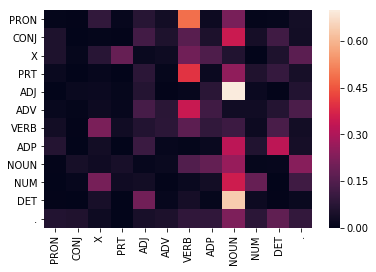

In [59]:
# heatmap of tags matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df_tags)
plt.show()

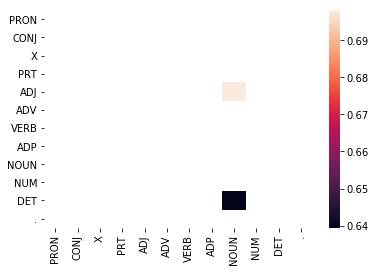

In [60]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = df_tags[df_tags>0.5]
plt.figure(figsize=(6, 4))
sns.heatmap(tags_frequent)
plt.show()

### Build the vanilla Viterbi based POS tagger

In [61]:
len(train_tagged_word_list)

95794

In [62]:
# Viterbi Heuristic function

def Viterbi(words, train_bag = train_tagged_word_list, tag_matrix=df_tags):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tag_matrix.loc['.', tag]
            else:
                transition_p = tag_matrix.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[2]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [64]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('His', 'PRON'),
  ('duties', 'NOUN'),
  ('as', 'ADP'),
  ('chief', 'ADJ'),
  ('executive', 'NOUN'),
  ('will', 'VERB'),
  ('be', 'VERB'),
  ('assumed', 'VERB'),
  ('*-121', 'X'),
  ('by', 'ADP'),
  ('Chairman', 'NOUN'),
  ('Jay', 'NOUN'),
  ('B.', 'NOUN'),
  ('Langner', 'NOUN'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Hahn', 'NOUN'),
  ('attributes', 'VERB'),
  ('the', 'DET'),
  ('gains', 'NOUN'),
  ('to', 'PRT'),
  ('the', 'DET'),
  ('philosophy', 'NOUN'),
  ('of', 'ADP'),
  ('*', 'X'),
  ('concentrating', 'VERB'),
  ('on', 'ADP'),
  ('what', 'PRON'),
  ('a', 'DET'),
  ('company', 'NOUN'),
  ('knows', 'VERB'),
  ('*T*-1', 'X'),
  ('best', 'ADJ'),
  ('.', '.')],
 [('The', 'DET'),
  ('1987', 'NUM'),
  ('statute', 'NOUN'),
  ('0', 'X'),
  ('Mrs.', 'NOUN'),
  ('Yeargin', 'NOUN'),
  ('violated', 'VERB'),
  ('*T*-1', 'X'),
  ('was', 'VERB'),
  ('designed', 'VERB'),
  ('*-2', 'X'),
  ('*-3', 'X'),
  ('to', 'PRT'),
  ('enforce', 'VERB'),
  ('provisions', 'NOUN'),
  ('of', 'ADP'),
  ('South',

In [65]:
# tagging the test sentences through Vanilla Viterbi Algorithm
start = time.time()
tagged_seq = Viterbi(train_tagged_word_list)
end = time.time()
difference = end-start

AttributeError: 'tuple' object has no attribute 'lower'

In [ ]:
print("Time taken in seconds: ", difference)
print(tagged_seq[:5])

In [91]:
# accuracy of Vanilla Viterbi Algorithm
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

NameError: name 'tagged_seq' is not defined

In [25]:
accuracy = len(check)/len(tagged_seq)

In [26]:
accuracy

0.9285714285714286

In [27]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [28]:
incorrect_tagged_cases

[[('10', 'NUM'), (('citizen-sparked', 'CONJ'), ('citizen-sparked', 'ADJ'))],
 [('state', 'NOUN'), (('ballots', 'CONJ'), ('ballots', 'NOUN'))],
 [('makes', 'VERB'), (('rechargeable', 'CONJ'), ('rechargeable', 'ADJ'))],
 [('nickel', 'NOUN'), (('cadmium', 'CONJ'), ('cadmium', 'NOUN'))],
 [('and', 'CONJ'), (('carbon', 'CONJ'), ('carbon', 'NOUN'))],
 [('carbon', 'NOUN'), (('zinc', 'CONJ'), ('zinc', 'NOUN'))],
 [('yield', 'VERB'), (('3.43', 'CONJ'), ('3.43', 'NUM'))]]

In [29]:
# Tagging the Sample File with the Vanila viterbi Function 

start=time.time()
sample_tagged_seq=Viterbi(SampleUntaggedWords)
end=time.time()
difference=end-start
print("Time taken in seconds: ", difference)
print(sample_tagged_seq)

Time taken in seconds:  30.520745754241943
[('Android', 'CONJ'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'CONJ'), ('.', '.'), ('Android', 'CONJ'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'CONJ'), ('worldwide', 'CONJ'), ('on', 'ADP'), ('smartphones', 'CONJ'), ('since', 'ADP'), ('2011', 'CONJ'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'CONJ'), ('.', '.'), ('Google', 'CONJ'), ('and', 'CONJ'), ('Twitter', 'CONJ'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'CONJ'), ('that', 'DET'), ('gave', 'VERB'), ('Google', 'CONJ'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'CONJ'), ("'s", 'VERB'), ('firehose', 'CONJ'), ('.', '.'), ('Twitter', 'CONJ'), ('is', 'VERB'), ('an', 'DET'), ('online', 'CONJ'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('servic

### Solve the problem of unknown words

### Method 1

### Regular Expression based Tagging on unknown words.

In [30]:
## Call the function for both train-test set and sample sentence provided and calculate accuracy before and after.
    
"""
Various patterns defined for recognizing the words that are not present in the vocabulary
"""
patterns = [
    (r'.*ing$', 'VERB'),               # gerunds
    (r'.*ed$', 'VERB'),                # simple past
    (r'.*es$', 'VERB'),                # 3rd singular present
    (r'.*ould$', 'VERB'),               # modals
    (r'.*\'s$', 'NOUN'),               # possessive nouns
    (r'.*s$', 'NOUN'),                 # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),  # numbers
    (r'(The|the|A|a|An|an)$', 'DET'),   # articles 
    (r'.*able$', 'ADJ'),                # adjectives 
    (r'.*ness$', 'NOUN'),                # nouns formed from adjectives
    (r'.*ly$', 'ADV'),                  # adverbs
    (r'(He|he|She|she|It|it|I|me|Me|You|you)$', 'PRON'), # pronouns
    (r'(His|his|Her|her|Its|its)$', 'PRON'),    # possesive
    (r'(my|Your|your|Yours|yours)$', 'PRON'),   # possesive
    (r'(on|On|in|In|at|At|since|Since)$', 'ADP'),# time prepopsitions
    (r'(for|For|ago|Ago|before|Before)$', 'ADP'),# time prepopsitions
    (r'(till|Till|until|Until)$', 'ADP'),        # time prepopsitions
    (r'(by|By|beside|Beside)$', 'ADP'),          # space prepopsitions
    (r'(under|Under|below|Below)$', 'ADP'),      # space prepopsitions
    (r'(over|Over|above|Above)$', 'ADP'),        # space prepopsitions
    (r'(across|Across|through|Through)$', 'ADP'),# space prepopsitions
    (r'(into|Into|towards|Towards)$', 'ADP'),    # space prepopsitions
    (r'(onto|Onto|from|From)$', 'ADP'),          # space prepopsitions    
    (r'[0-9]+\-[0-9]+', 'NUM'),                      # Number     
    (r'^\*', 'X'),                        
    (r'.*', 'NOUN')                      # nouns (default) as the maximum number of words are assigned Nouns
    ]

In [31]:
# Viterbi Heuristic Function based on on Regex Patterns

def Viterbi_with_Regex_Patterns(words, RegexPattern=patterns, train_bag = train_tagged_words, tag_matrix=df_tags):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    Vocab=list(set(pair[0] for pair in train_bag))
    regexp_tagger = nltk.RegexpTagger(RegexPattern)

    for key, word in enumerate(words):
        if (words[key] in Vocab):
            #initialise list of probability column for a given observation
            p = [] 
            for tag in T:
                if key == 0:
                    transition_p = tag_matrix.loc['.', tag]
                else:
                    transition_p = tag_matrix.loc[state[-1], tag]
                # compute emission and state probabilities
                emission_p = word_given_tag(words[key], tag)[2]
                state_probability = emission_p * transition_p    
                p.append(state_probability)
            pmax = max(p)
            # getting state for which probability is maximum
            state_max = T[p.index(pmax)] 
            state.append(state_max)
        else:
            Derived_Tag=regexp_tagger.tag([words[key]])[0][1]
            state.append(Derived_Tag)
    return list(zip(words, state))

In [32]:
start = time.time()
tagged_seq_technique1 = Viterbi_with_Regex_Patterns(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print(tagged_seq_technique1[:50])

Time taken in seconds:  15.131865501403809
[('He', 'PRON'), ('added', 'VERB'), (',', '.'), ('``', '.'), ('There', 'DET'), ("'s", 'VERB'), ('nothing', 'NOUN'), ('very', 'ADV'), ('hot', 'ADJ'), ('.', '.'), ("''", '.'), ('He', 'PRON'), ('says', 'VERB'), ('0', 'X'), ('the', 'DET'), ('10', 'NUM'), ('citizen-sparked', 'VERB'), ('issues', 'NOUN'), ('on', 'ADP'), ('state', 'NOUN'), ('ballots', 'NOUN'), ('this', 'DET'), ('fall', 'NOUN'), ('represent', 'VERB'), ('the', 'DET'), ('most', 'ADJ'), ('in', 'ADP'), ('any', 'DET'), ('odd-year', 'NOUN'), ('this', 'DET'), ('decade', 'NOUN'), ('.', '.'), ('That', 'DET'), ('ought', 'VERB'), ('*-1', 'X'), ('to', 'PRT'), ('make', 'VERB'), ('sure', 'ADJ'), ('0', 'X'), ('we', 'PRON'), ("'re", 'VERB'), ('all', 'DET'), ('thinking', 'VERB'), ('for', 'ADP'), ('the', 'DET'), ('long', 'ADJ'), ('term', 'NOUN'), ('.', '.'), ('The', 'DET'), ('battery', 'NOUN')]


In [33]:
check_technique1 = [i for i, j in zip(tagged_seq_technique1, test_run_base) if i == j] 
accuracy_technique1 = len(check_technique1)/len(tagged_seq)
accuracy_technique1

0.9795918367346939

In [34]:
# Tagging the Sample File with the Viterbi Function Technique I - 
# implementing Regex function for the unknown words

start=time.time()
sample_tagged_seq_technique_1=Viterbi_with_Regex_Patterns(SampleUntaggedWords)
end=time.time()
difference=end-start
print("Time taken in seconds: ", difference)
print(sample_tagged_seq_technique_1)

Time taken in seconds:  24.701412677764893
[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'VERB'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 

###  Method 2

<b>Probablistic approach, based on the previous Tag / Transitional Probability</b>

In [35]:
def Viterbi_with_TransitionPobability(words, RegexPattern=patterns, train_bag = train_tagged_words, tag_matrix=df_tags):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    Vocab=list(set(pair[0] for pair in train_bag))

    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tag_matrix.loc['.', tag]
            else:
                transition_p = tag_matrix.loc[state[-1], tag]
            # compute emission and state probabilities
            if (words[key] in Vocab):
                emission_p = word_given_tag(words[key], tag)[2]
            else:
                emission_p=1
            state_probability = emission_p * transition_p    
            p.append(state_probability)
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [36]:
start = time.time()
tagged_seq_technique2= Viterbi_with_TransitionPobability(test_tagged_words)
end = time.time()
difference = end-start

print("Time taken in seconds: ", difference)
print(tagged_seq_technique2[:50])

Time taken in seconds:  15.851906538009644
[('He', 'PRON'), ('added', 'VERB'), (',', '.'), ('``', '.'), ('There', 'DET'), ("'s", 'VERB'), ('nothing', 'NOUN'), ('very', 'ADV'), ('hot', 'ADJ'), ('.', '.'), ("''", '.'), ('He', 'PRON'), ('says', 'VERB'), ('0', 'X'), ('the', 'DET'), ('10', 'NUM'), ('citizen-sparked', 'NOUN'), ('issues', 'NOUN'), ('on', 'ADP'), ('state', 'NOUN'), ('ballots', 'NOUN'), ('this', 'DET'), ('fall', 'NOUN'), ('represent', 'VERB'), ('the', 'DET'), ('most', 'ADJ'), ('in', 'ADP'), ('any', 'DET'), ('odd-year', 'NOUN'), ('this', 'DET'), ('decade', 'NOUN'), ('.', '.'), ('That', 'DET'), ('ought', 'VERB'), ('*-1', 'X'), ('to', 'PRT'), ('make', 'VERB'), ('sure', 'ADJ'), ('0', 'X'), ('we', 'PRON'), ("'re", 'VERB'), ('all', 'DET'), ('thinking', 'VERB'), ('for', 'ADP'), ('the', 'DET'), ('long', 'ADJ'), ('term', 'NOUN'), ('.', '.'), ('The', 'DET'), ('battery', 'NOUN')]


In [37]:
check_technique2 = [i for i, j in zip(tagged_seq_technique2, test_run_base) if i == j] 
accuracy_technique2 = len(check_technique2)/len(tagged_seq)
accuracy_technique2

0.9591836734693877

In [38]:
# Tagging the Sample File with the Viterbi Function Technique II
# implementing tagging based on the transition probability in case word is not in vocabulary

start=time.time()
sample_tagged_seq_technique_2=Viterbi_with_TransitionPobability(SampleUntaggedWords)
end=time.time()
difference=end-start
print("Time taken in seconds: ", difference)
print(sample_tagged_seq_technique_2)

Time taken in seconds:  25.974485874176025
[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'DET'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'DET'), ('since', 'ADP'), ('2011', 'DET'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'DET'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'DET'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'X'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'VERB'), ("'s", 'PRT'), ('firehose', 'VERB'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN

### Evauating Accuracy for three methods(Vanilla,Regex,Probablistic)

In [39]:
(accuracy, accuracy_technique1, accuracy_technique2)

(0.9285714285714286, 0.9795918367346939, 0.9591836734693877)

In [40]:
# Incorrect tagged cases obtained with the vanila Viterbi Function
print("Length of incorrect Tags : ", len(incorrect_tagged_cases))
incorrect_tagged_cases

Length of incorrect Tags :  7


[[('10', 'NUM'), (('citizen-sparked', 'CONJ'), ('citizen-sparked', 'ADJ'))],
 [('state', 'NOUN'), (('ballots', 'CONJ'), ('ballots', 'NOUN'))],
 [('makes', 'VERB'), (('rechargeable', 'CONJ'), ('rechargeable', 'ADJ'))],
 [('nickel', 'NOUN'), (('cadmium', 'CONJ'), ('cadmium', 'NOUN'))],
 [('and', 'CONJ'), (('carbon', 'CONJ'), ('carbon', 'NOUN'))],
 [('carbon', 'NOUN'), (('zinc', 'CONJ'), ('zinc', 'NOUN'))],
 [('yield', 'VERB'), (('3.43', 'CONJ'), ('3.43', 'NUM'))]]

In [41]:
# Incorrect tagged cases obtained with the Viterbi Function using the Regex Pattern 
incorrect_tagged_cases_technique_1 = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_technique1, test_run_base)) if j[0]!=j[1]]
print("Length of incorrect Tags : ", len(incorrect_tagged_cases_technique_1))
incorrect_tagged_cases_technique_1

Length of incorrect Tags :  2


[[('10', 'NUM'), (('citizen-sparked', 'VERB'), ('citizen-sparked', 'ADJ'))],
 [('any', 'DET'), (('odd-year', 'NOUN'), ('odd-year', 'ADJ'))]]

In [42]:
# Incorrect tagged cases obtained with the Viterbi Function using transition probability in case of unknown words
incorrect_tagged_cases_technique_2 = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_technique2, test_run_base)) if j[0]!=j[1]]
print("Length of incorrect Tags : ", len(incorrect_tagged_cases_technique_2))
incorrect_tagged_cases_technique_2

Length of incorrect Tags :  4


[[('10', 'NUM'), (('citizen-sparked', 'NOUN'), ('citizen-sparked', 'ADJ'))],
 [('any', 'DET'), (('odd-year', 'NOUN'), ('odd-year', 'ADJ'))],
 [('makes', 'VERB'), (('rechargeable', 'X'), ('rechargeable', 'ADJ'))],
 [('yield', 'VERB'), (('3.43', 'X'), ('3.43', 'NUM'))]]

In [43]:
# Comparison of the Tagging done by Vanilla Approach and modified Approach on Sample File. 

Sample_Tagged_Comparison_List = list(zip(sample_tagged_seq,sample_tagged_seq_technique_1,sample_tagged_seq_technique_2))
Sample_Tagged_Comparison_List

[(('Android', 'CONJ'), ('Android', 'NOUN'), ('Android', 'NOUN')),
 (('is', 'VERB'), ('is', 'VERB'), ('is', 'VERB')),
 (('a', 'DET'), ('a', 'DET'), ('a', 'DET')),
 (('mobile', 'ADJ'), ('mobile', 'ADJ'), ('mobile', 'ADJ')),
 (('operating', 'NOUN'), ('operating', 'NOUN'), ('operating', 'NOUN')),
 (('system', 'NOUN'), ('system', 'NOUN'), ('system', 'NOUN')),
 (('developed', 'VERB'), ('developed', 'VERB'), ('developed', 'VERB')),
 (('by', 'ADP'), ('by', 'ADP'), ('by', 'ADP')),
 (('Google', 'CONJ'), ('Google', 'NOUN'), ('Google', 'DET')),
 (('.', '.'), ('.', '.'), ('.', '.')),
 (('Android', 'CONJ'), ('Android', 'NOUN'), ('Android', 'NOUN')),
 (('has', 'VERB'), ('has', 'VERB'), ('has', 'VERB')),
 (('been', 'VERB'), ('been', 'VERB'), ('been', 'VERB')),
 (('the', 'DET'), ('the', 'DET'), ('the', 'DET')),
 (('best-selling', 'ADJ'), ('best-selling', 'ADJ'), ('best-selling', 'ADJ')),
 (('OS', 'CONJ'), ('OS', 'NOUN'), ('OS', 'NOUN')),
 (('worldwide', 'CONJ'), ('worldwide', 'NOUN'), ('worldwide', 'NO

#### From the above list it is concluded that Numbers are handled well by the modified algo whereas the Vanilla Vetibri Failed to do so.

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

In [44]:
Differences =[x for x in Sample_Tagged_Comparison_List if (x[0]!=x[1]) | (x[0]!=x[2]) | (x[1]!=x[2])]
Differences

[(('Android', 'CONJ'), ('Android', 'NOUN'), ('Android', 'NOUN')),
 (('Google', 'CONJ'), ('Google', 'NOUN'), ('Google', 'DET')),
 (('Android', 'CONJ'), ('Android', 'NOUN'), ('Android', 'NOUN')),
 (('OS', 'CONJ'), ('OS', 'NOUN'), ('OS', 'NOUN')),
 (('worldwide', 'CONJ'), ('worldwide', 'NOUN'), ('worldwide', 'NOUN')),
 (('smartphones', 'CONJ'), ('smartphones', 'VERB'), ('smartphones', 'DET')),
 (('2011', 'CONJ'), ('2011', 'NUM'), ('2011', 'DET')),
 (('2013', 'CONJ'), ('2013', 'NUM'), ('2013', 'DET')),
 (('Google', 'CONJ'), ('Google', 'NOUN'), ('Google', 'NOUN')),
 (('Twitter', 'CONJ'), ('Twitter', 'NOUN'), ('Twitter', 'NOUN')),
 (('2015', 'CONJ'), ('2015', 'NUM'), ('2015', 'DET')),
 (('that', 'DET'), ('that', 'ADP'), ('that', 'ADP')),
 (('Google', 'CONJ'), ('Google', 'NOUN'), ('Google', 'X')),
 (('Twitter', 'CONJ'), ('Twitter', 'NOUN'), ('Twitter', 'VERB')),
 (("'s", 'VERB'), ("'s", 'PRT'), ("'s", 'PRT')),
 (('firehose', 'CONJ'), ('firehose', 'NOUN'), ('firehose', 'VERB')),
 (('Twitter', 

### Cases which were incorrectly predicted but got correct by the modified Vanila Algorithm are :-

#### 1.Number was incorrectly predicted by the Vanilla algorithm which was corrected by the modified Algorithm

#### 2.Words like  tournament was incorrectly predicted  by Vanilla Algorithm which was later on corrected by Modified Algorithm.

#### 3.Words like NASA was incorrectly predicted  by Vanilla Algorithm was later on corrected as by modified Algorithm.